In [1]:
import numpy as np
import pandas as pd
import math
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from datetime import datetime

start_time = datetime.now()

# 2. Анализ данных, удалие выбросов

In [2]:
df = pd.read_csv('data/data1.csv')
df

,status,propertyType,baths,fireplace,sqft,zipcode,beds,state,PrivatePool,target,...,is_heating,is_heating_gas,is_heating_electric,is_heating_central,is_cooling,average_school_rating,average_school_distance,num_schools,has_private_school,is_average_school_rating_missing
0,for_sale,single,3,1,2900,28387,4,NC,0,418000,...,1,0,0,1,0,5.200000,5.54,8,1,0
1,for_sale,single,3,0,1947,99216,3,WA,0,310000,...,0,0,0,0,0,4.000000,1.33,3,0,0
2,for_sale,single,2,1,3000,90049,3,CA,1,2895000,...,1,0,0,0,1,6.666667,1.96,3,0,0
3,for_sale,single,8,1,6457,75205,5,TX,0,2395000,...,1,0,0,0,1,9.250000,0.75,4,0,0
4,for_sale,land,0,0,0,32908,0,FL,0,5000,...,0,0,0,0,0,4.666667,4.08,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368885,unknown,single,6,0,4017,33180,5,FL,1,1249000,...,1,0,0,0,1,7.500000,16.60,2,0,0
368886,for_sale,condo,3,0,2000,60657,3,IL,0,674999,...,1,0,0,0,0,4.333333,4.14,3,0,0
368887,for_sale,single,3,0,1152,11434,3,NY,0,528000,...,1,0,0,0,0,4.500000,0.60,2,0,0
368888,unknown,unknown,0,0,0,77028,0,TX,0,34500,...,0,0,0,0,0,5.000000,1.23,3,0,1


In [3]:
category_columns = ['status', 'propertyType', 'zipcode', 'state']
for column in category_columns:
    df[column] = df[column].astype('category')

binary_columns = []
for column in df.columns:
    value_counts = df[column].value_counts()
    if set(value_counts.index) == {0, 1}:
        print(f'The column {column} contains only 0 and 1')
        binary_columns.append(column)

numeric_columns = []
for column in df.columns:
    if column in category_columns or column in binary_columns:
        continue
    numeric_columns.append(column)

print("\n\nCategory columns: ", category_columns)
print("Binary columns: ", binary_columns)
print("Numeric columns: ", numeric_columns)

The column fireplace contains only 0 and 1
The column PrivatePool contains only 0 and 1
The column parking contains only 0 and 1
The column is_remodeled contains only 0 and 1
The column is_year_built_missing contains only 0 and 1
The column is_heating contains only 0 and 1
The column is_heating_gas contains only 0 and 1
The column is_heating_electric contains only 0 and 1
The column is_heating_central contains only 0 and 1
The column is_cooling contains only 0 and 1
The column has_private_school contains only 0 and 1
The column is_average_school_rating_missing contains only 0 and 1


Category columns:  ['status', 'propertyType', 'zipcode', 'state']
Binary columns:  ['fireplace', 'PrivatePool', 'parking', 'is_remodeled', 'is_year_built_missing', 'is_heating', 'is_heating_gas', 'is_heating_electric', 'is_heating_central', 'is_cooling', 'has_private_school', 'is_average_school_rating_missing']
Numeric columns:  ['baths', 'sqft', 'beds', 'target', 'year_built', 'average_school_rating', 'av

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368890 entries, 0 to 368889
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   status                            368890 non-null  category
 1   propertyType                      368890 non-null  category
 2   baths                             368890 non-null  int64   
 3   fireplace                         368890 non-null  int64   
 4   sqft                              368890 non-null  int64   
 5   zipcode                           368890 non-null  category
 6   beds                              368890 non-null  int64   
 7   state                             368890 non-null  category
 8   PrivatePool                       368890 non-null  int64   
 9   target                            368890 non-null  int64   
 10  year_built                        368890 non-null  float64 
 11  parking                           36889

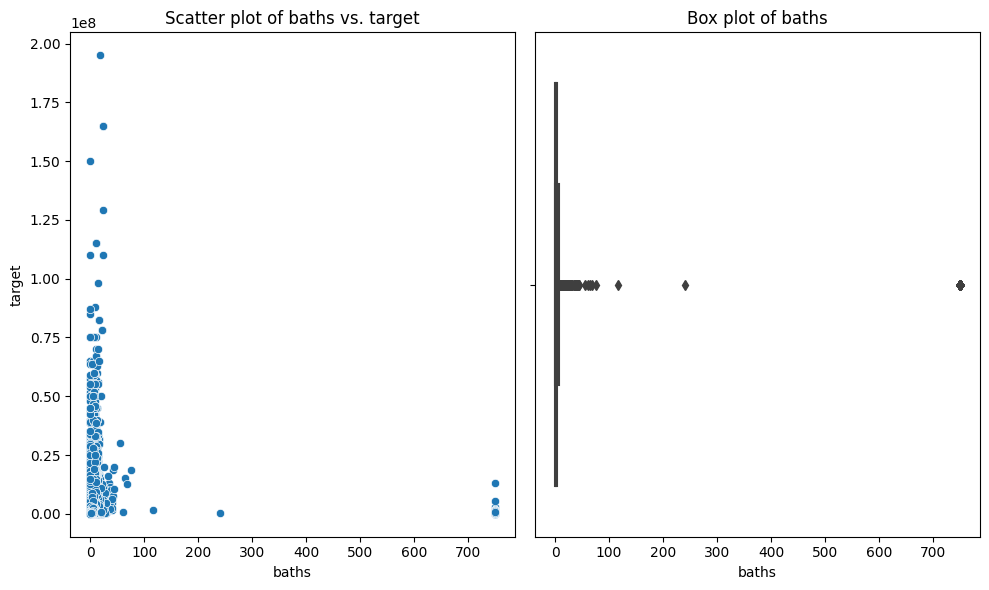

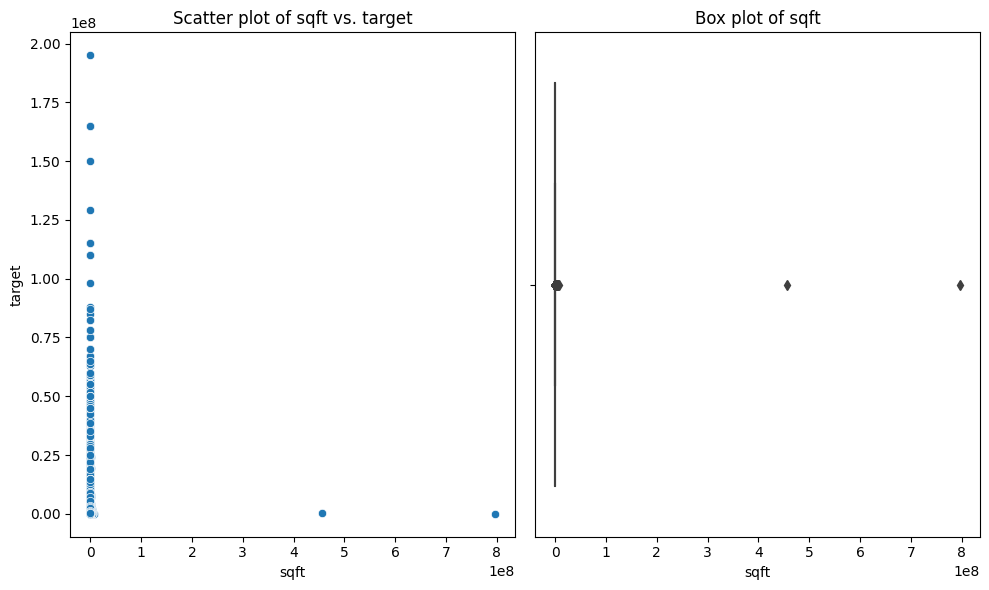

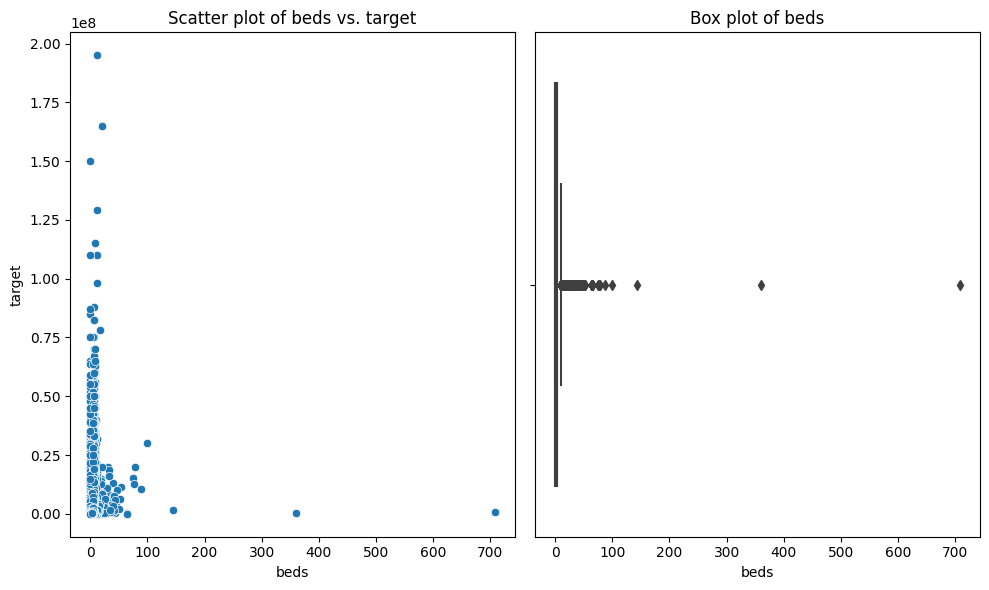

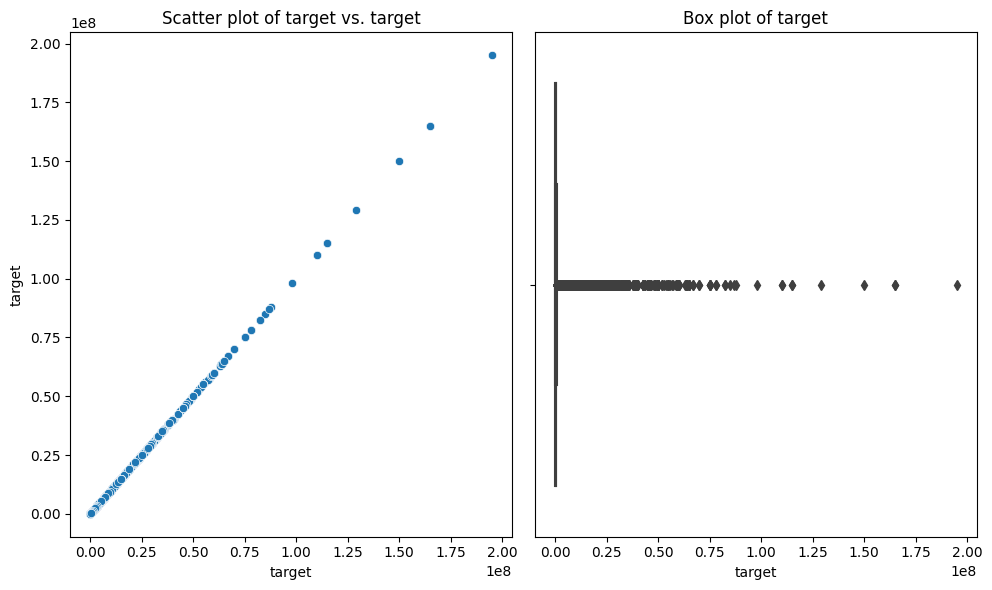

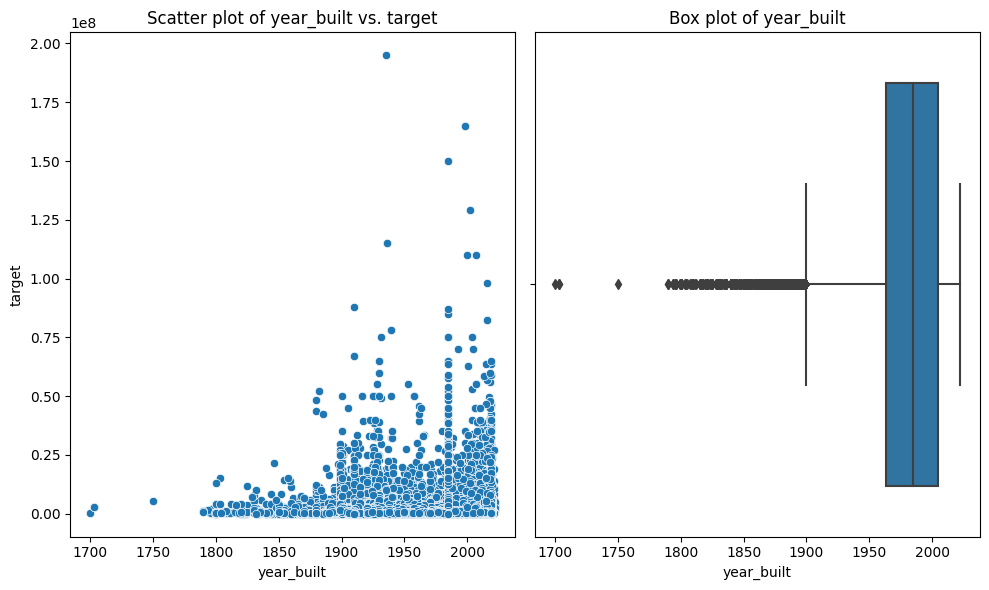

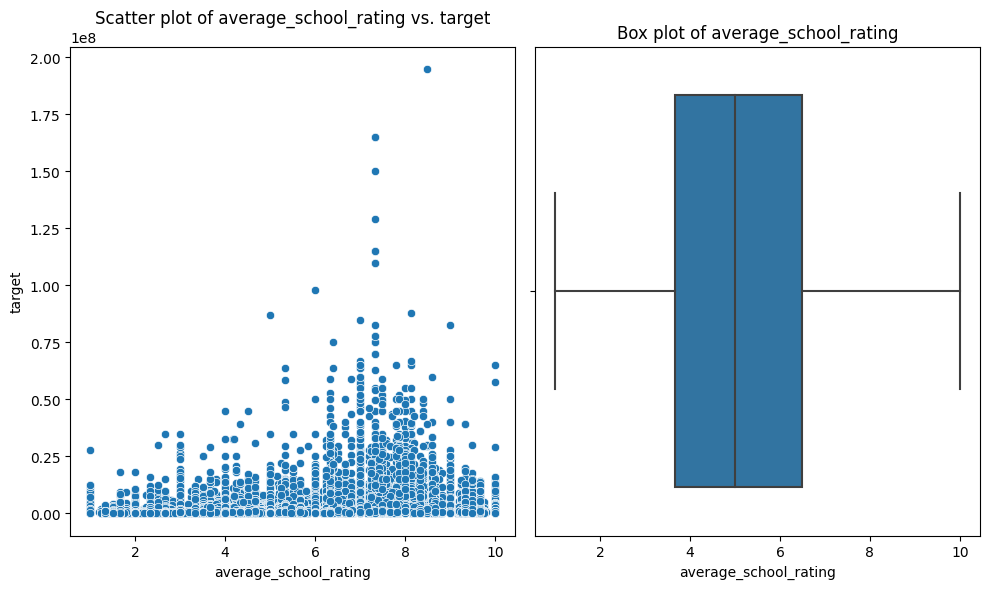

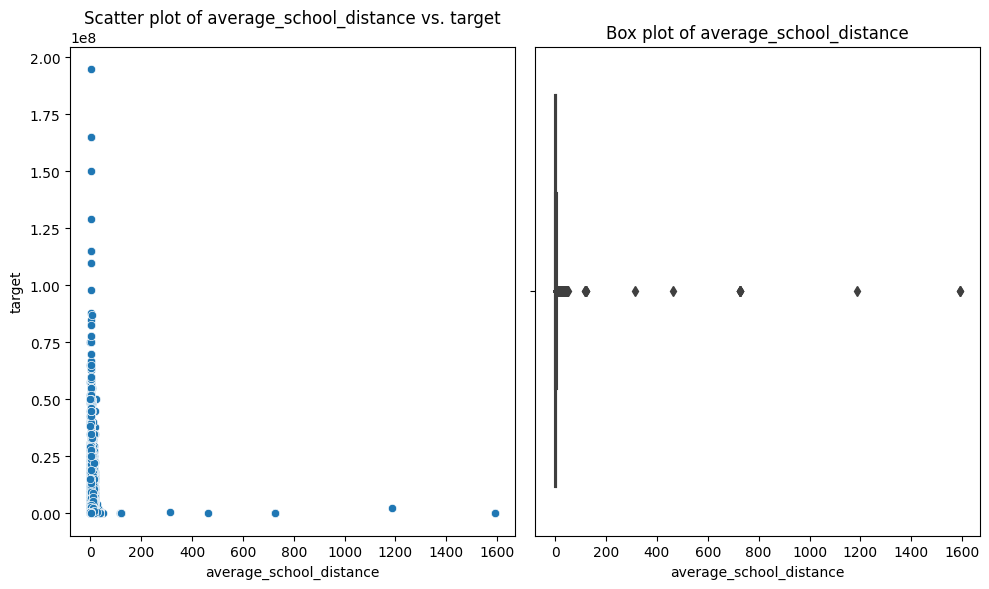

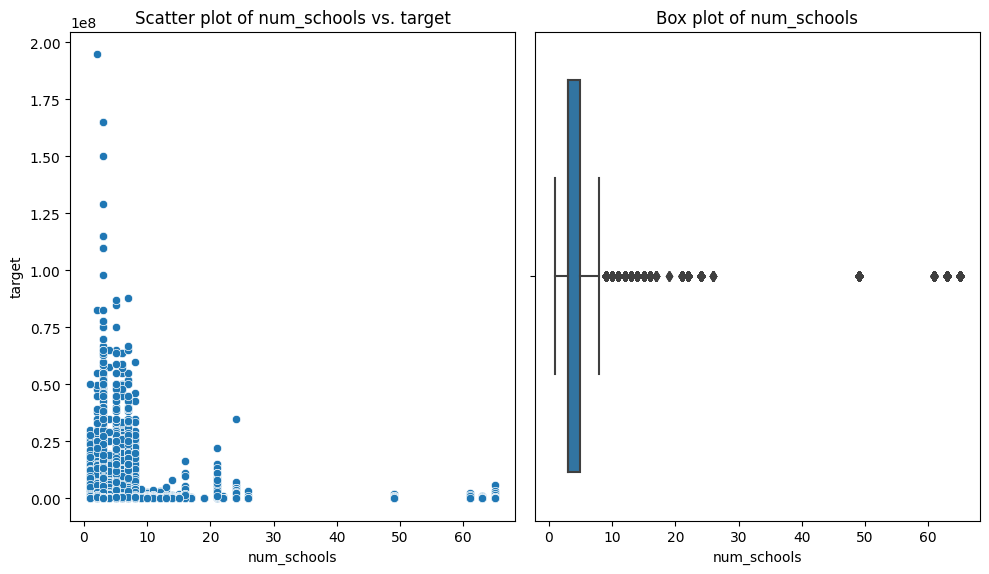

In [5]:
for column in numeric_columns:
    plt.figure(figsize=(10, 6))

    # График рассеивания
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[column], y=df['target'])
    plt.title(f"Scatter plot of {column} vs. target")
    plt.xlabel(column)
    plt.ylabel('target')

    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

In [6]:
for column in numeric_columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers_index = np.where(z_scores > 3)[0]
    print(f'Outliers in {column}:', len(outliers_index))

    # удаляем выбросы
    df = df.drop(outliers_index)
    df.reset_index(drop=True, inplace=True)

Outliers in baths: 243
Outliers in sqft: 4
Outliers in beds: 991
Outliers in target: 3855
Outliers in year_built: 1351
Outliers in average_school_rating: 0
Outliers in average_school_distance: 555
Outliers in num_schools: 5412


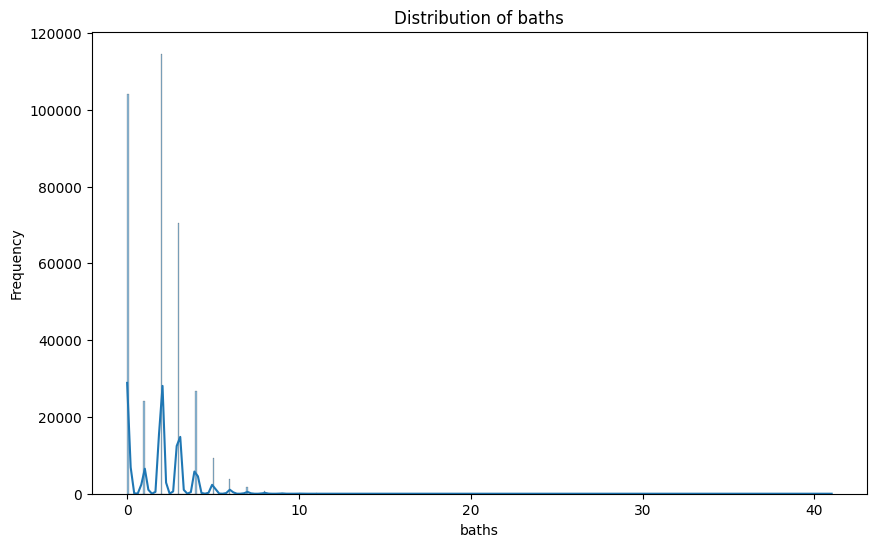

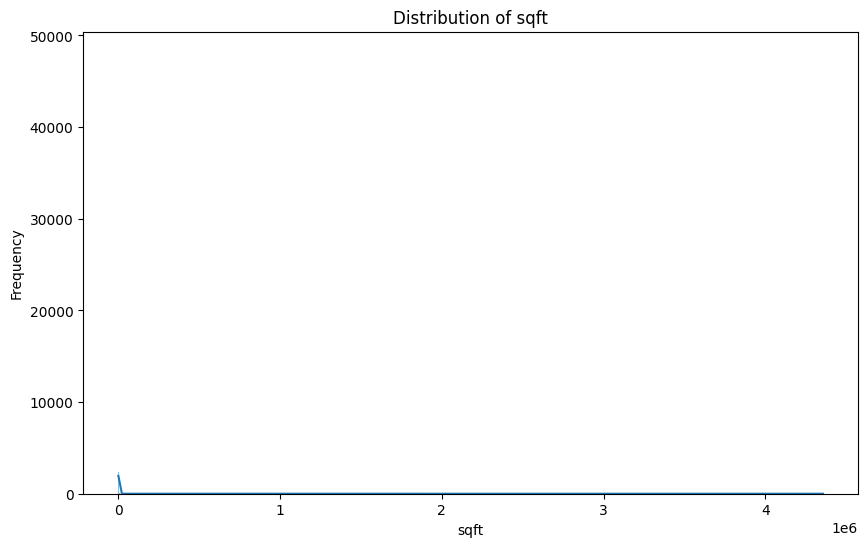

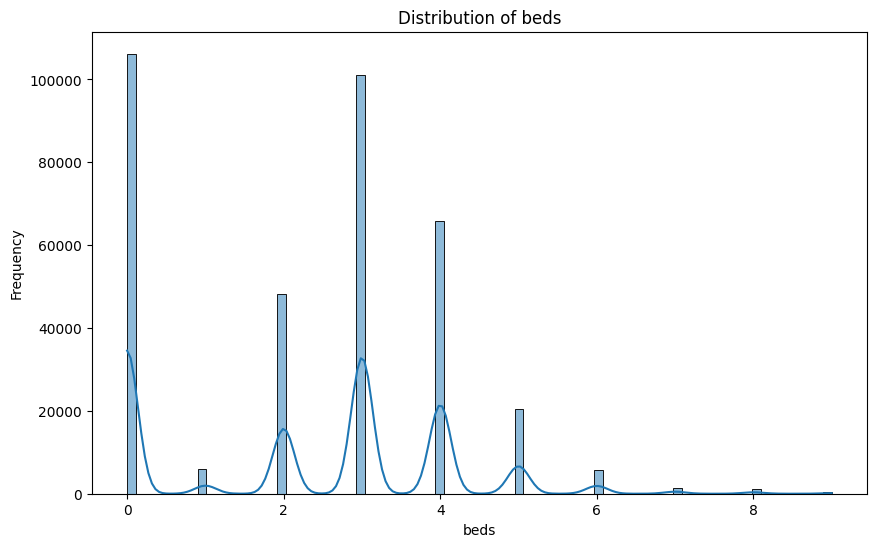

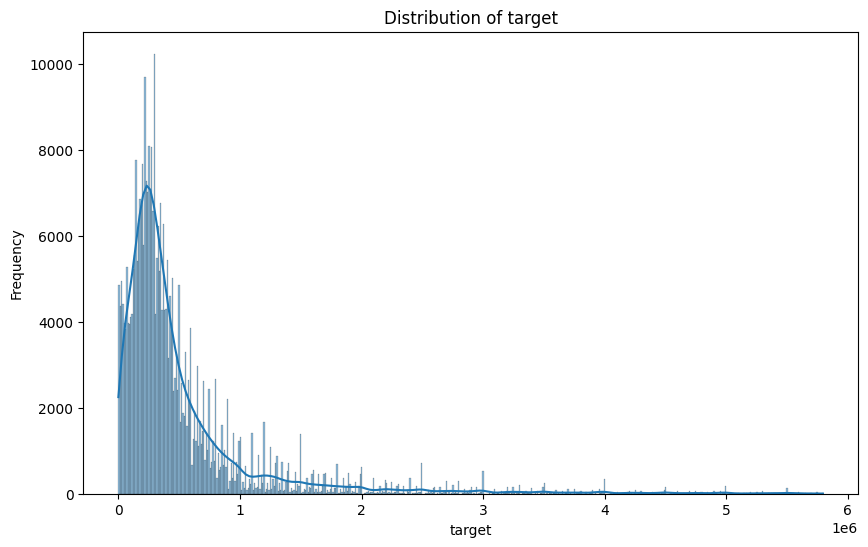

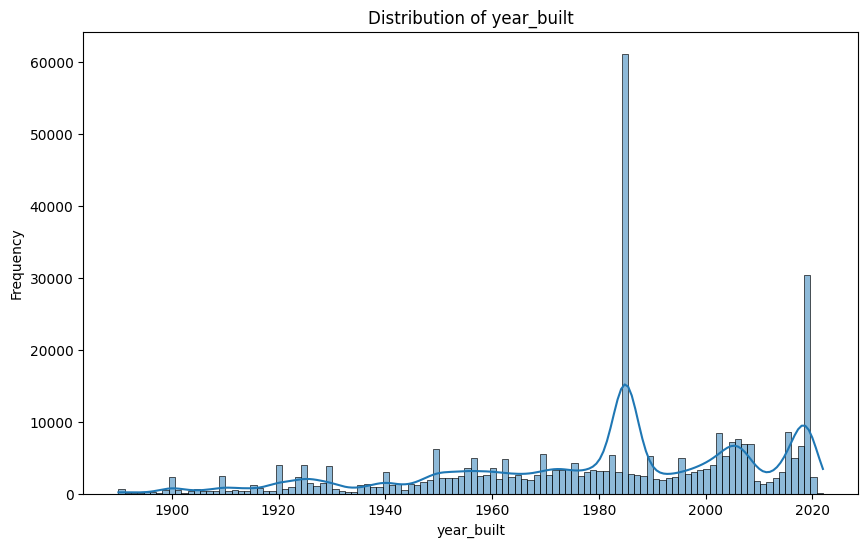

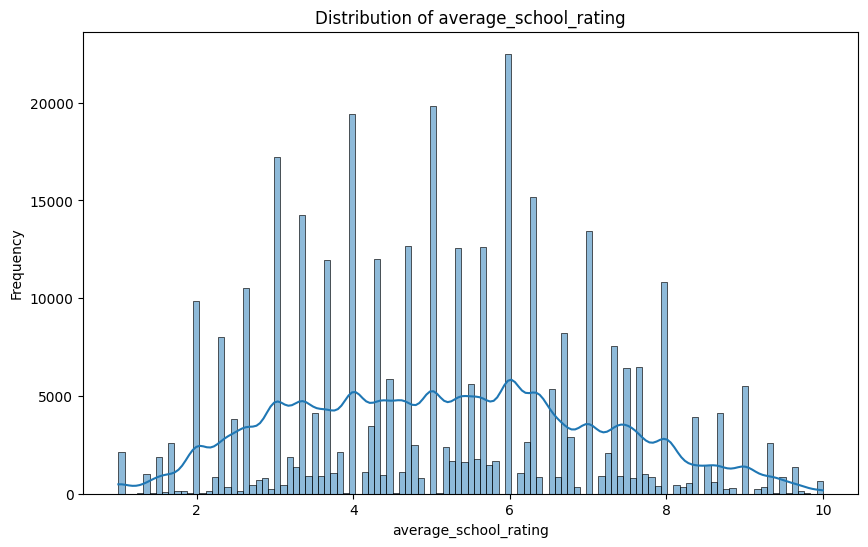

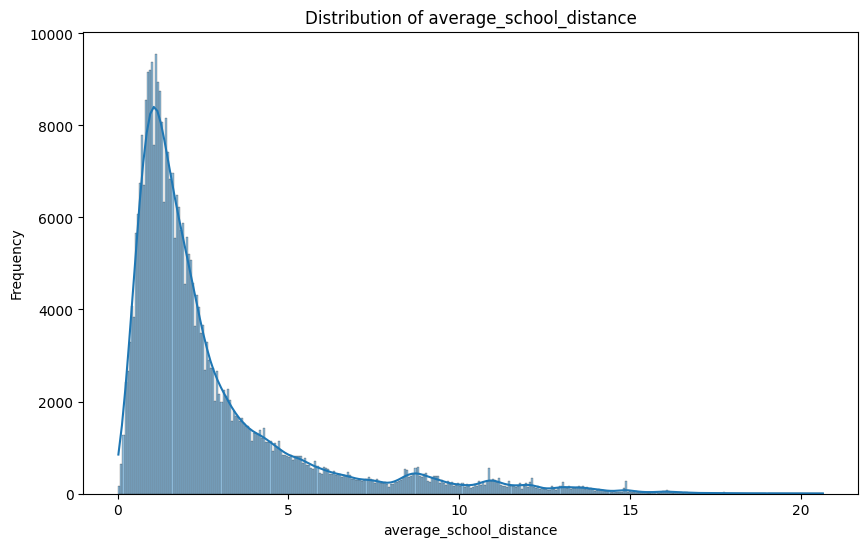

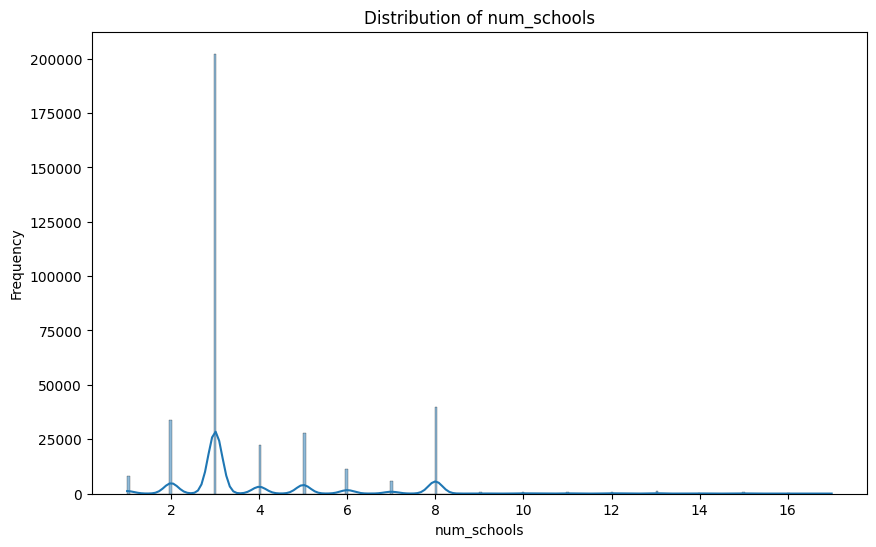

In [7]:
# Создаем график распределения для каждого числового признака
for column in numeric_columns:
    plt.figure(figsize=(10, 6))

    # Гистограмма и KDE
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.show()

Признаки `target` и `average_school_distance` больше других похожи на норманое распределение, поэтому проведем статистические тесты, чтобы доказать эта "похожесть" все же не является нормальным распределением.

Поскольку данных у нас более 350 000, то тест Шапиро-Уилка (с ограниченим в 5 000 наблюдений) здесь не подходит.

In [8]:
# Выполнение теста Колмогорова-Смирнова
stat, p = stats.kstest(df['target'], 'norm', args=(df['target'].mean(), df['target'].std()))
print('Статистика теста Колмогорова-Смирнова=%.3f, p-значение=%.3f' % (stat, p))

# Интерпретация результата
alpha = 0.05
if p > alpha:
    print('Распределение признака target нормально (не отклоняем H0)')
else:
    print('Распределение признака target ненормально (отклоняем H0)')

Статистика теста Колмогорова-Смирнова=0.221, p-значение=0.000
Распределение признака target ненормально (отклоняем H0)


In [9]:
# Выполнение теста Андреса-Дарлинга
result = stats.anderson(df['target'])
print('Статистика теста Андреса-Дарлинга=%.3f' % result.statistic)

# Интерпретация результата
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'Распределение нормально при уровне значимости {sl}% (не отклоняем H0)')
    else:
        print(f'Распределение ненормально при уровне значимости {sl}% (отклоняем H0)')

Статистика теста Андреса-Дарлинга=37776.543
Распределение ненормально при уровне значимости 15.0% (отклоняем H0)
Распределение ненормально при уровне значимости 10.0% (отклоняем H0)
Распределение ненормально при уровне значимости 5.0% (отклоняем H0)
Распределение ненормально при уровне значимости 2.5% (отклоняем H0)
Распределение ненормально при уровне значимости 1.0% (отклоняем H0)


In [10]:
# Выполнение теста Колмогорова-Смирнова
stat, p = stats.kstest(df['average_school_distance'], 'norm', args=(df['average_school_distance'].mean(), df['average_school_distance'].std()))
print('Статистика теста Колмогорова-Смирнова=%.3f, p-значение=%.3f' % (stat, p))

# Интерпретация результата
alpha = 0.05
if p > alpha:
    print('Распределение признака average_school_distance нормально (не отклоняем H0)')
else:
    print('Распределение признака average_school_distance ненормально (отклоняем H0)')

Статистика теста Колмогорова-Смирнова=0.203, p-значение=0.000
Распределение признака average_school_distance ненормально (отклоняем H0)


baths: skewness=0.9320820035273157, kurtosis=5.204101940797184


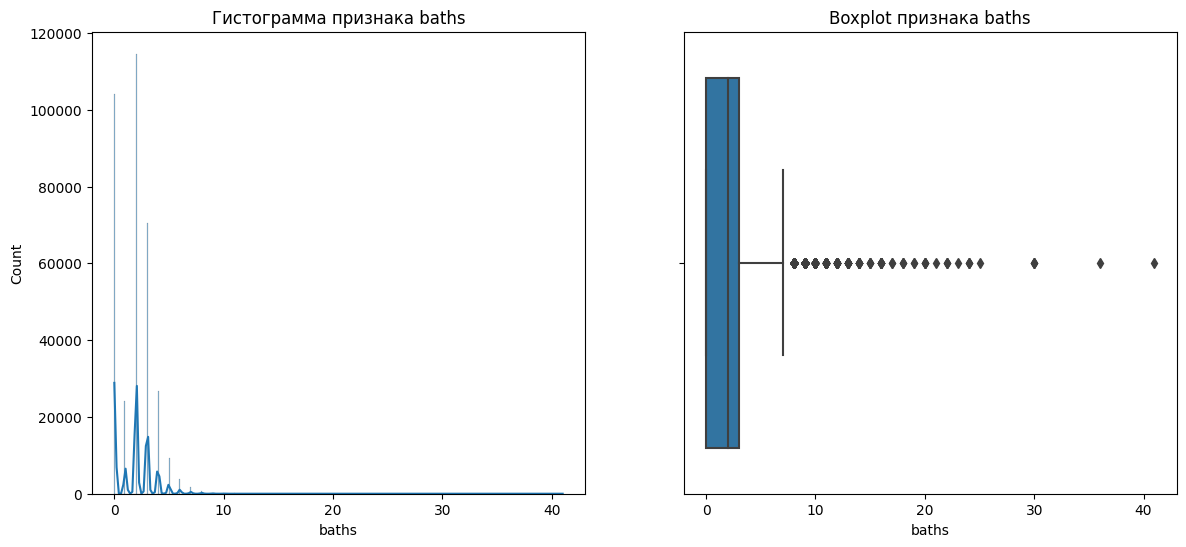

Логарифмирование не требуется для признака baths
sqft: skewness=99.22015090018614, kurtosis=15529.62132770297


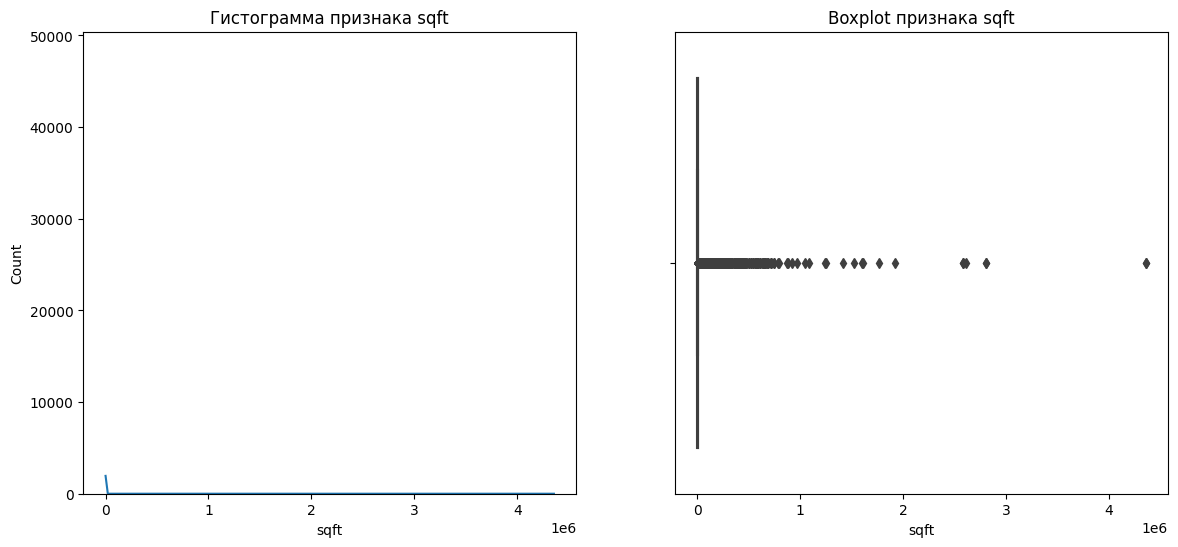

Логарифмирование применено к признаку sqft


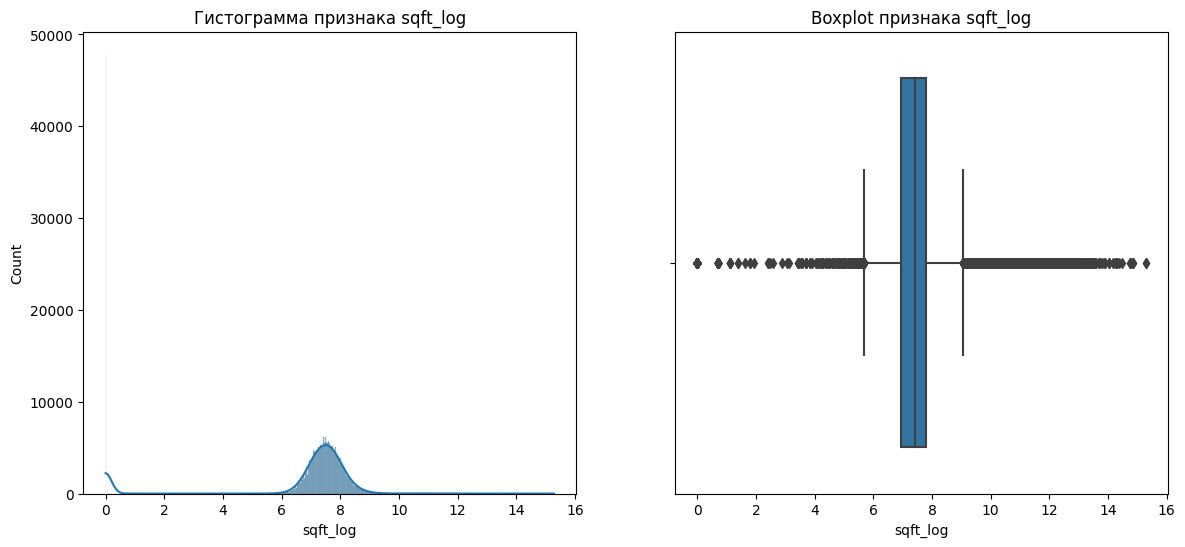

beds: skewness=0.06752221271612849, kurtosis=-0.6612355806282162


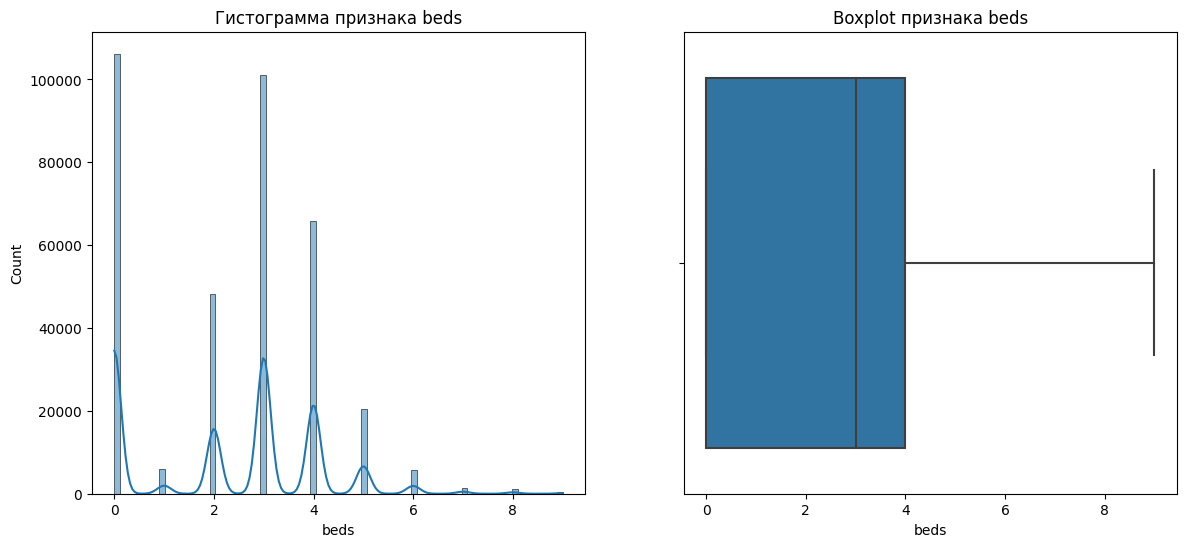

Логарифмирование не требуется для признака beds
target: skewness=3.6335250835701443, kurtosis=17.103799935821023


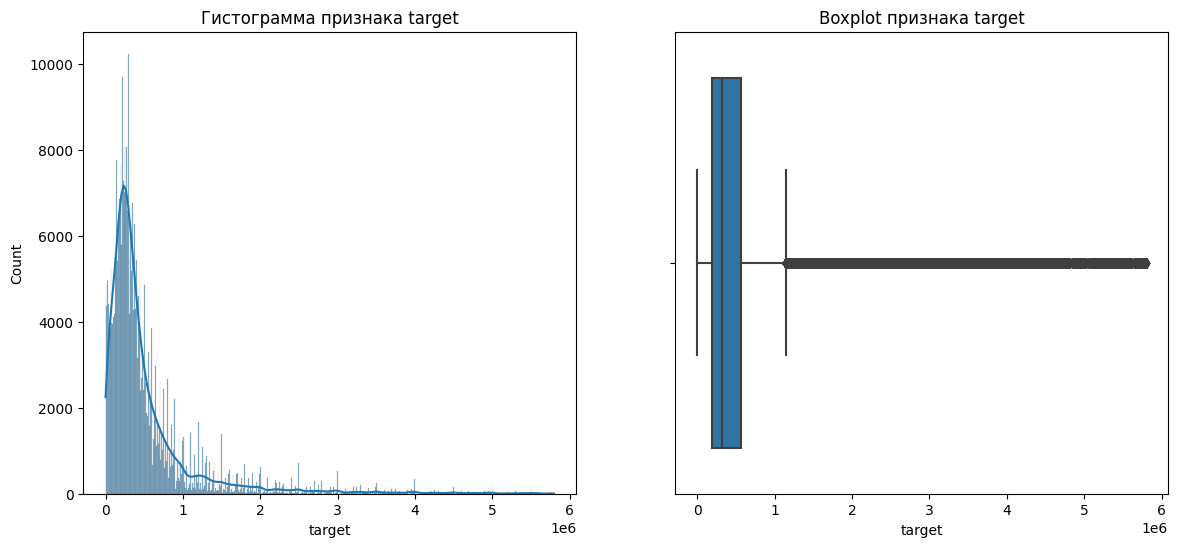

Логарифмирование применено к признаку target


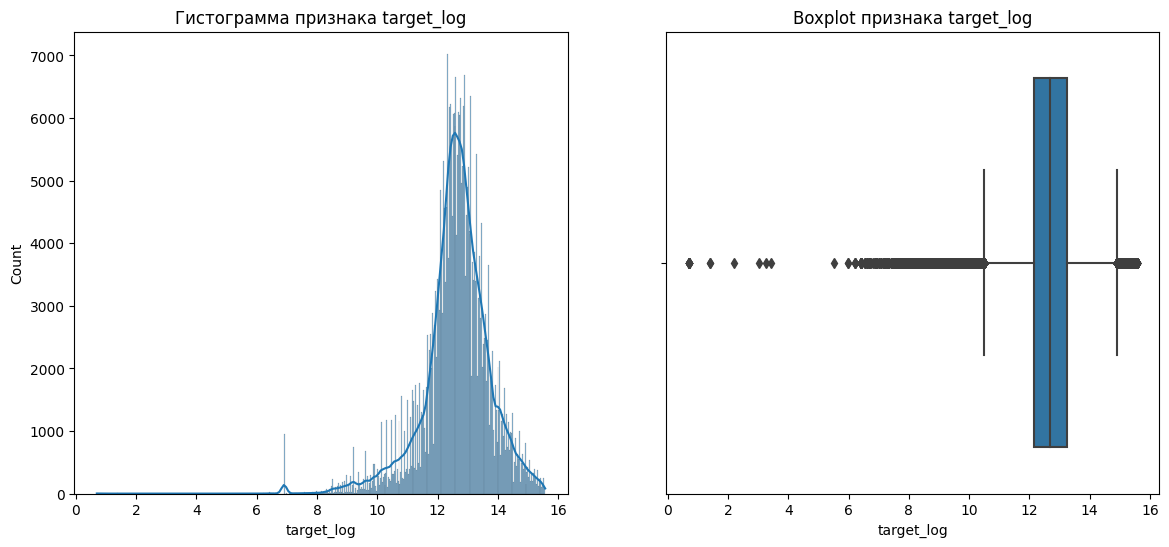

year_built: skewness=-0.7710275526983813, kurtosis=0.005472689360875194


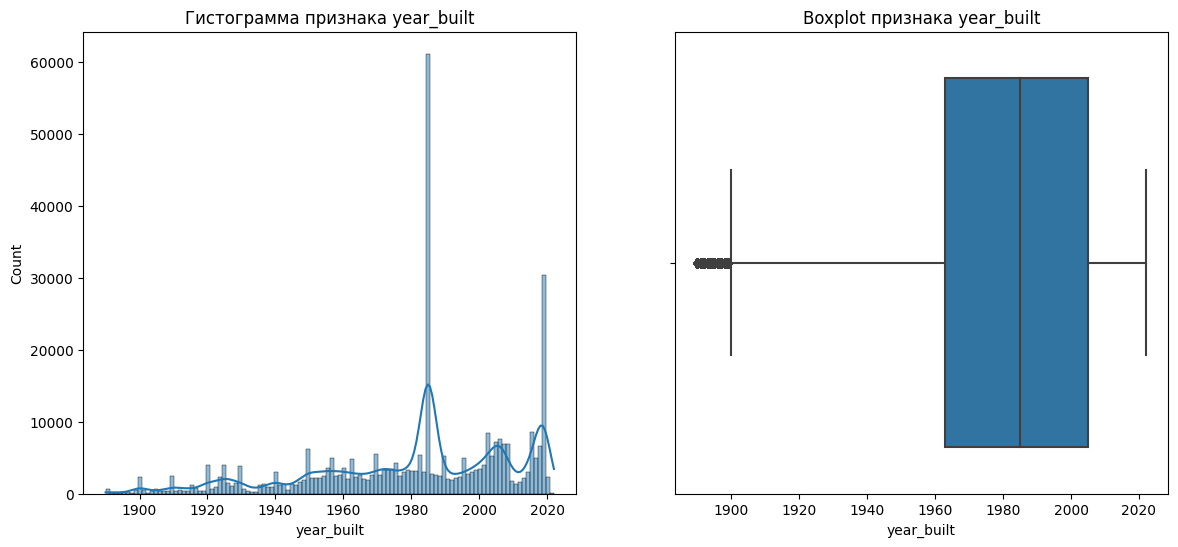

Логарифмирование не требуется для признака year_built
average_school_rating: skewness=0.1495666932448046, kurtosis=-0.7037739676877086


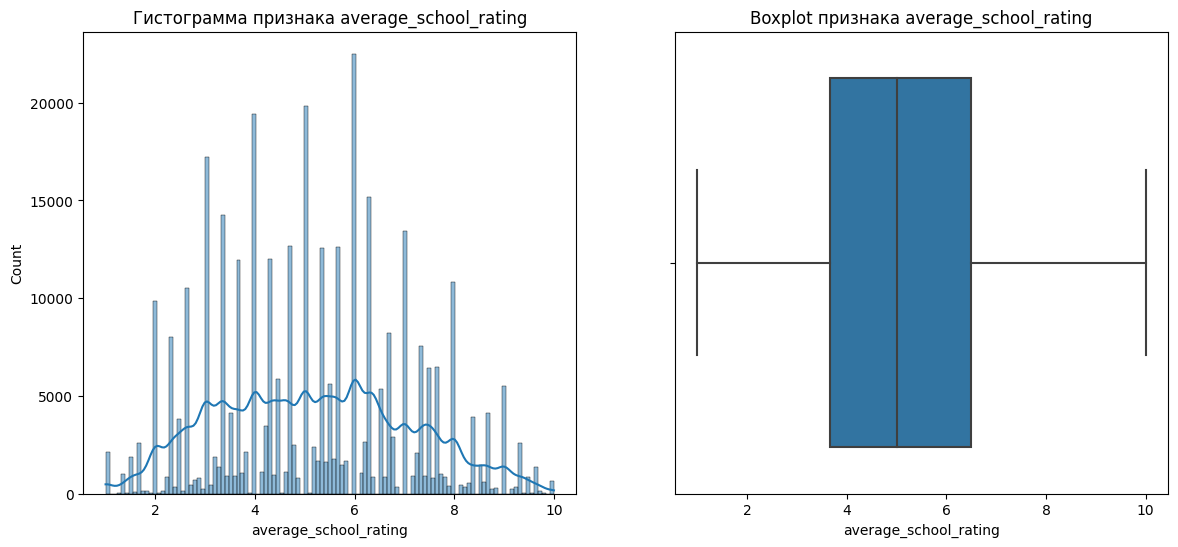

Логарифмирование не требуется для признака average_school_rating
average_school_distance: skewness=2.3165041035590495, kurtosis=5.833812792070352


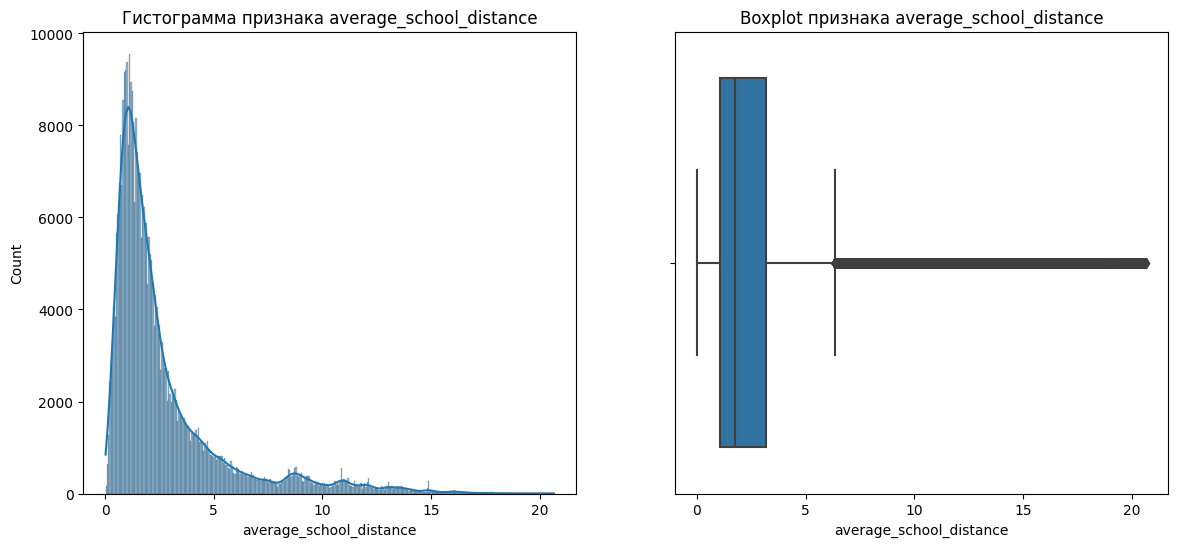

Логарифмирование применено к признаку average_school_distance


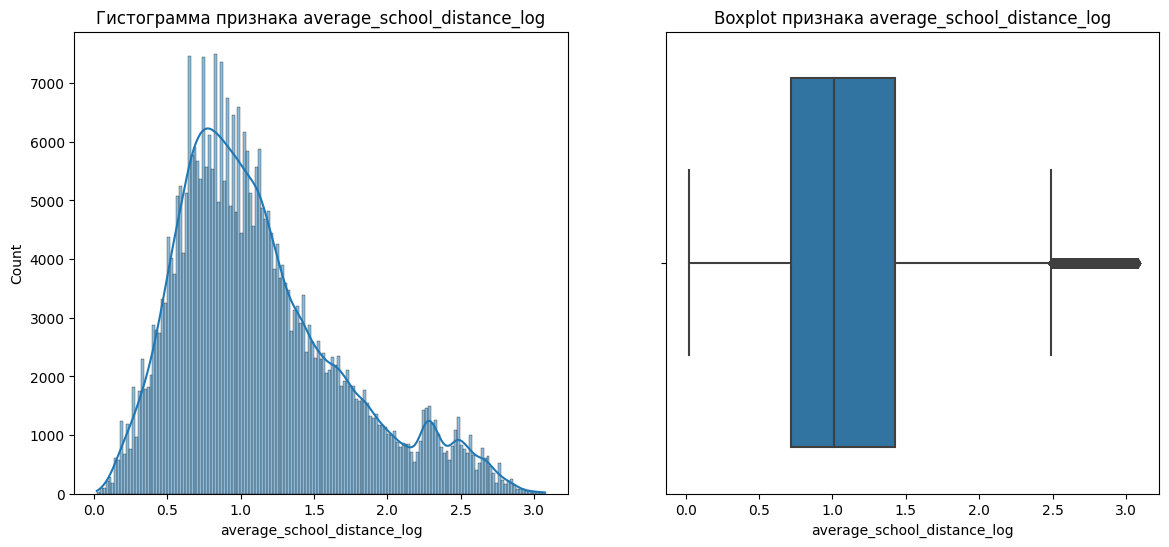

num_schools: skewness=1.7693584993915268, kurtosis=3.561543162503785


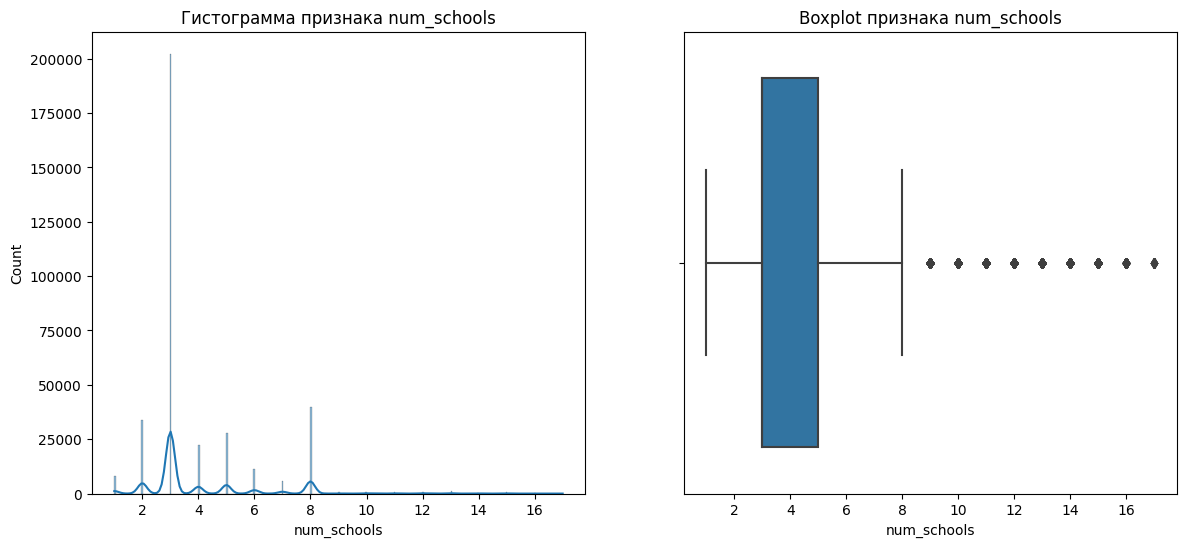

Логарифмирование применено к признаку num_schools


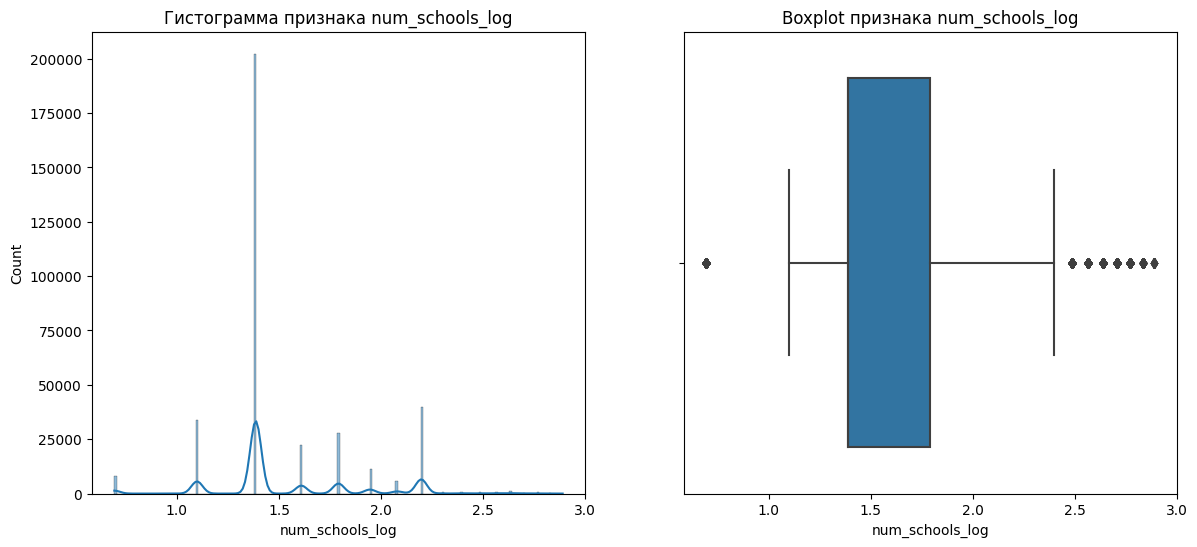

In [11]:
# Анализ распределения признаков

def plot_feature_distribution(df, feature):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Гистограмма признака {feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot признака {feature}')

    plt.show()

for feature in numeric_columns:
    print(f'{feature}: skewness={stats.skew(df[feature])}, kurtosis={stats.kurtosis(df[feature])}')
    plot_feature_distribution(df, feature)

    # Проверка необходимости логарифмирования
    if stats.skew(df[feature]) > 1 or stats.skew(df[feature]) < -1:
        df[f'{feature}_log'] = np.log1p(df[feature])
        print(f'Логарифмирование применено к признаку {feature}')
        plot_feature_distribution(df, f'{feature}_log')
    else:
        print(f'Логарифмирование не требуется для признака {feature}')

#### Выводы
* числовые признаки не распределены нормально
* у признаков разные масштабы, поэтому необходима нормализация
* вычислили коэффициент асимметрии (skewness) и эксцесс (kurtosis) для количественной оценки асимметрию и формы распределения. Это позволило узнать, требуется ли логарифмирование признаков:
    * нужно логарифмирование для признаков:
        * `sqft`
        * `target`
        * `average_school_distance`
        * `num_schools`
    * не требуется логарифмирование для признаков:
        * `baths`
        * `beds`
        * `year_built`
        * `average_school_rating`
* произвели логарифмирование для признаков:
    * `sqft`
    * `target`
    * `average_school_distance`
    * `num_schools`

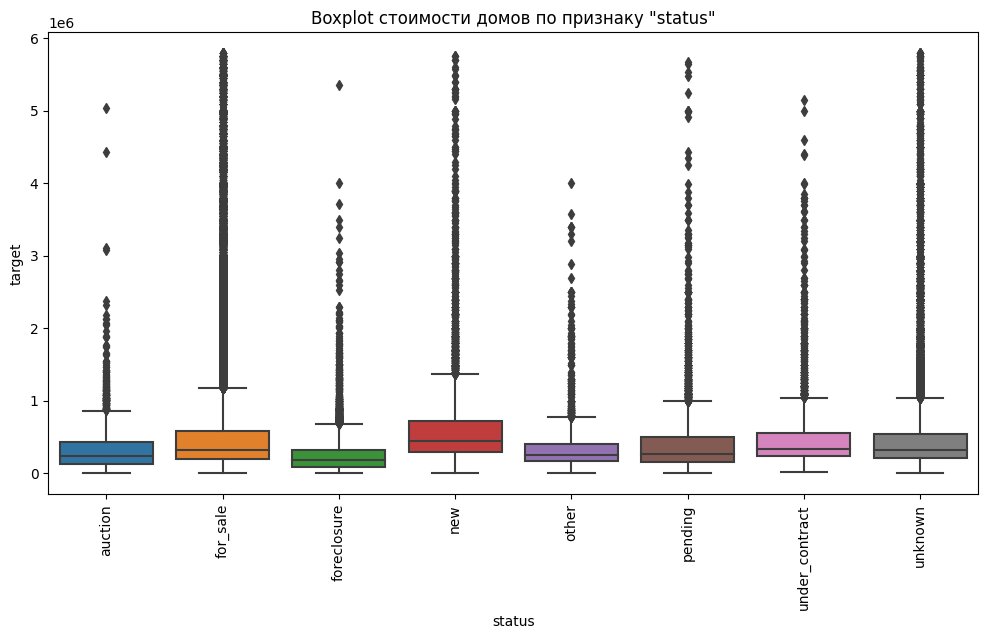

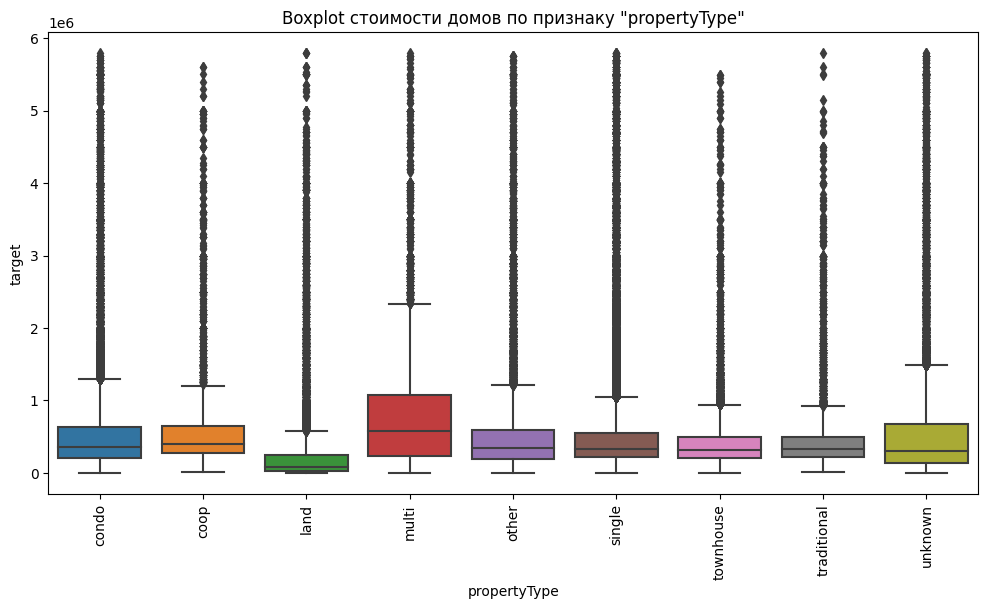

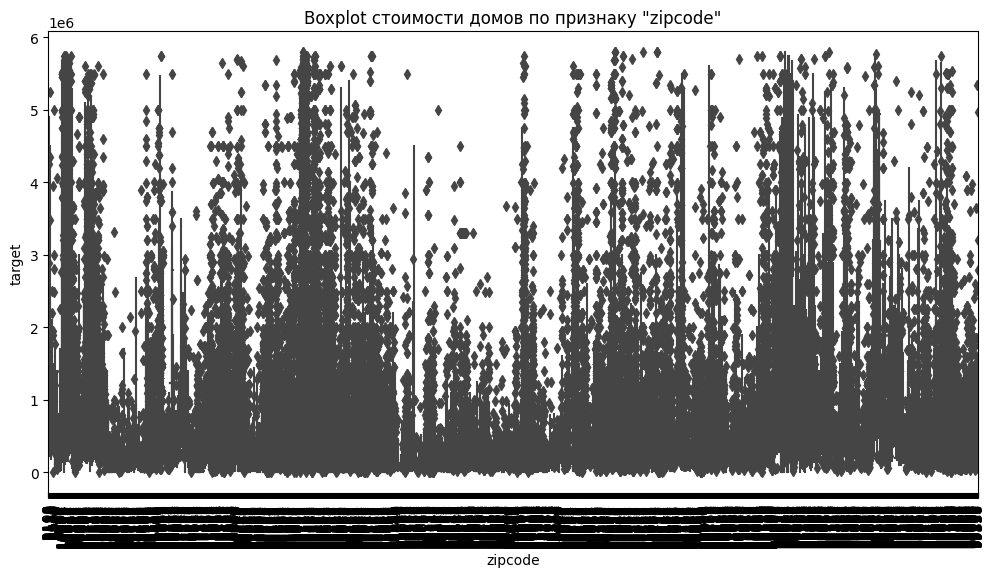

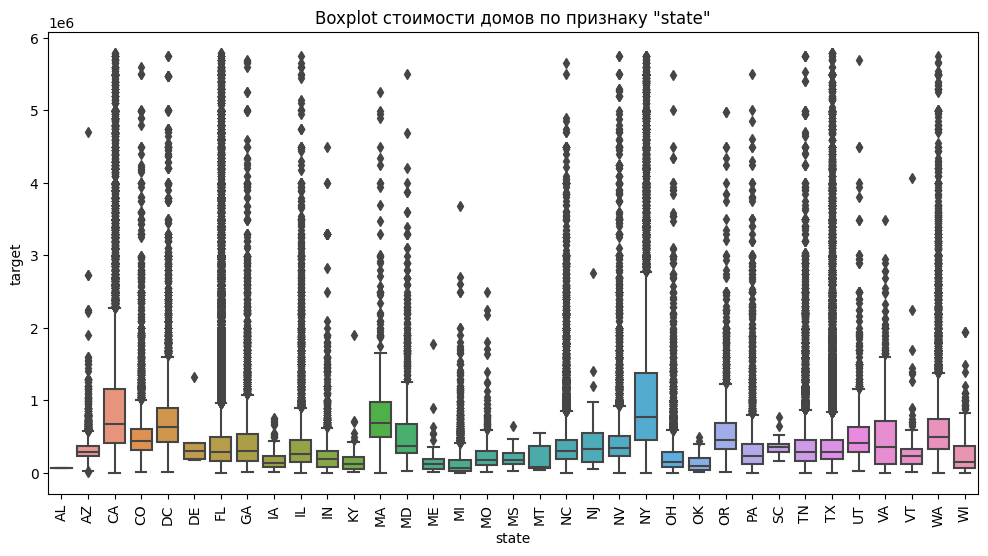

In [12]:
# Создаем график распределения для каждого категориального признака

for column in category_columns:
    plt.figure(figsize=(12, 6))

    sns.boxplot(x=df[column], y=df['target'])
    plt.title(f'Boxplot стоимости домов по признаку "{column}"')
    plt.xticks(rotation=90)

    plt.show()

Проведем ANOVA тест над категориальными признаками (исключая `zipcode` поскольку там содержится большое количество уникальных значений, что сильно замедляет работу теста), чтобы определить существуют ли значимые различия в средних значениях целевой переменной (`target`) между группами, определенными категориальными признакоми.

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA тест для категориальных признаков
for column in [item for item in category_columns if item != 'zipcode']:
    model = ols(f'target ~ C({column})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA для {column}')
    print(anova_table)
    print('\n')

ANOVA для status
                 sum_sq        df           F  PR(>F)
C(status)  9.490060e+14       7.0  325.418009     0.0
Residual   1.485093e+17  356471.0         NaN     NaN


ANOVA для propertyType
                       sum_sq        df          F  PR(>F)
C(propertyType)  3.207244e+15       8.0  977.16076     0.0
Residual         1.462510e+17  356470.0        NaN     NaN


ANOVA для state
                sum_sq        df          F  PR(>F)
C(state)  1.619563e+16      34.0  1274.0948     0.0
Residual  1.332626e+17  356444.0        NaN     NaN




Для определения влияние признака `zipcode` на цену дома воспользуемся критерием Крускала-Уоллиса

In [14]:
import scipy.stats as stats

# Сгруппировать данные по zipcode
groups = [df[df['zipcode'] == zip_code]['target'].values for zip_code in df['zipcode'].unique()]

# Применить критерий Крускала-Уоллиса
stat, p_value = stats.kruskal(*groups)
print(f"Statistic: {stat}, p-value: {p_value:.3f}")

Statistic: 195704.41546803163, p-value: 0.000


#### Выводы: 
* Высокие значения F-статистики и P-значения меньше 0.05 в ANOVA тестах говорят о том, что существуют статистически значимые различия в средних значениях стоимости домов между различными группами для всех категориальных признаков, поэтому все категориальные признаки должны быть включены в модель предсказания.
* Можно утверждать, что `zipcode` влияет на стоимость домов. Очень низкое значение p-value подтверждает статистическую значимость различий между группами с разным почтовым индексом, что логично, поскольку в разных районах цены домов могут существенно отличаться.


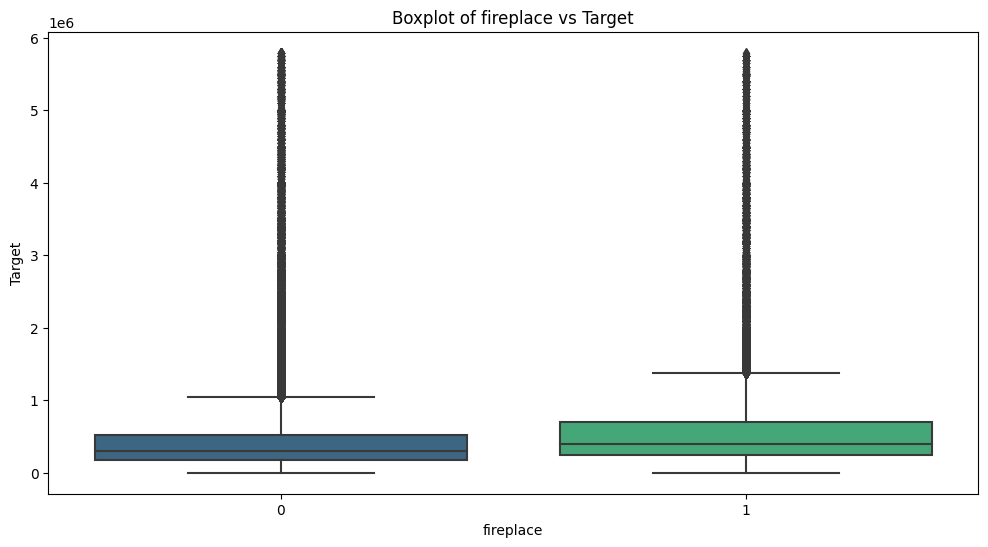

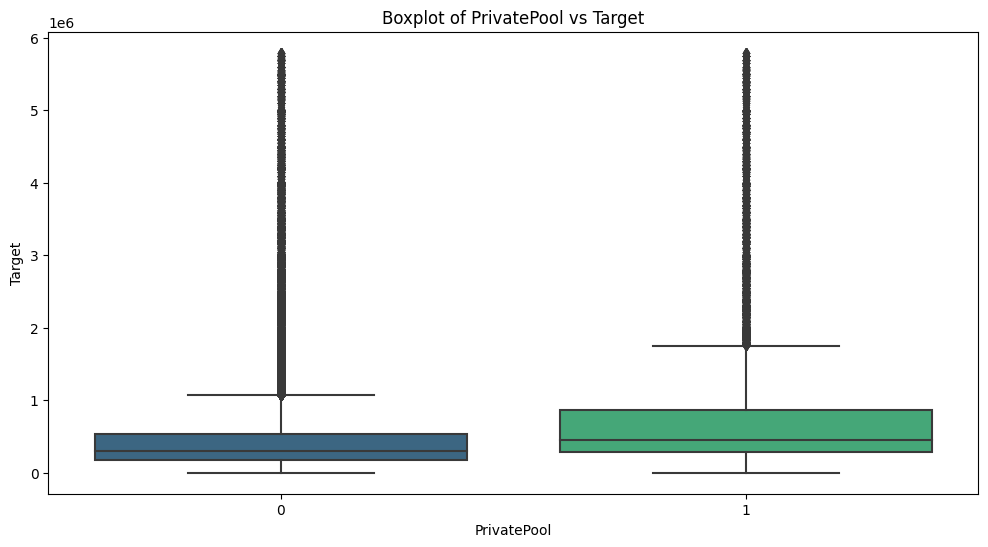

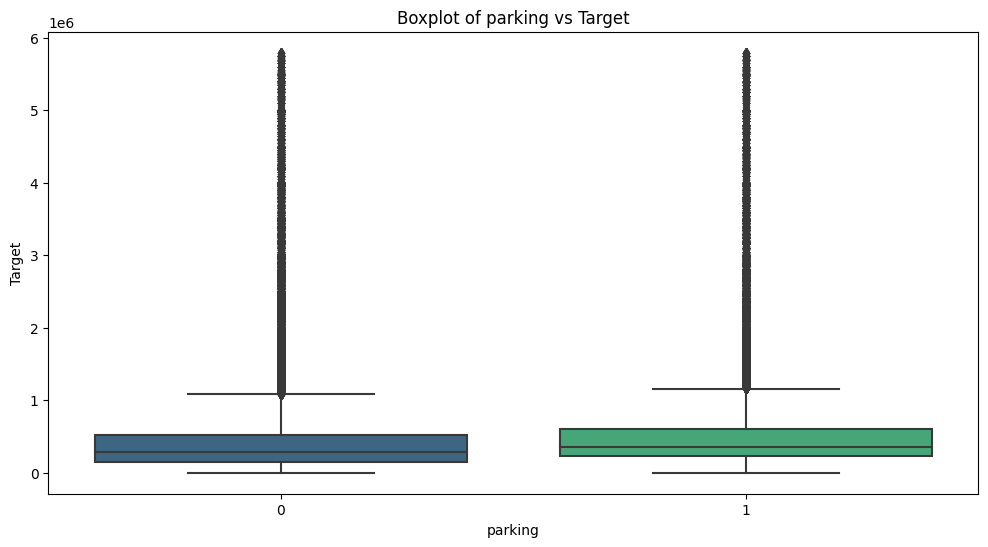

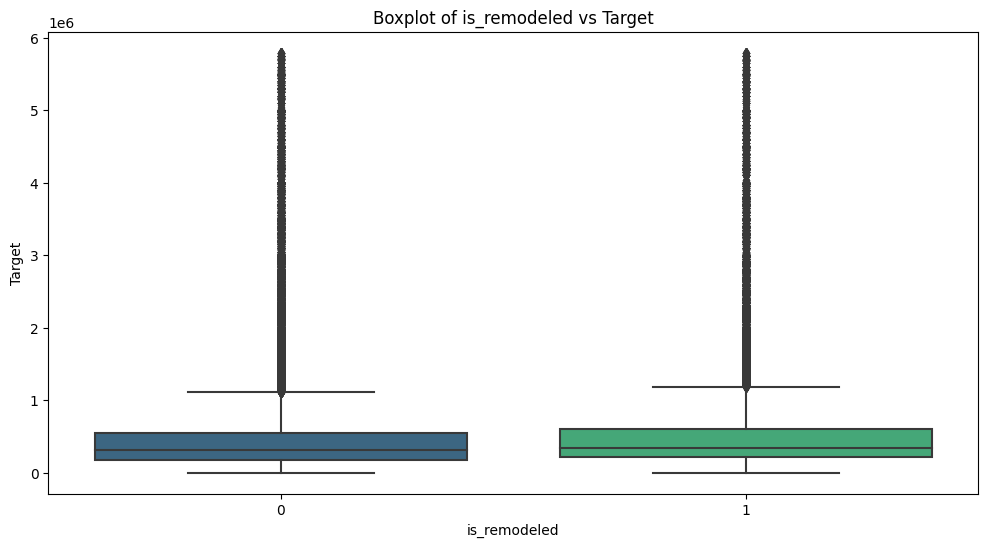

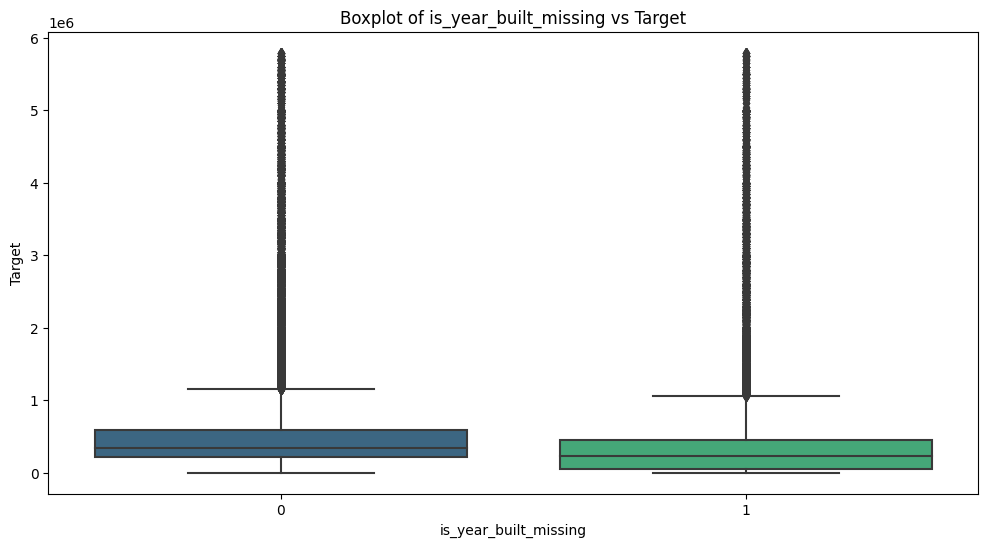

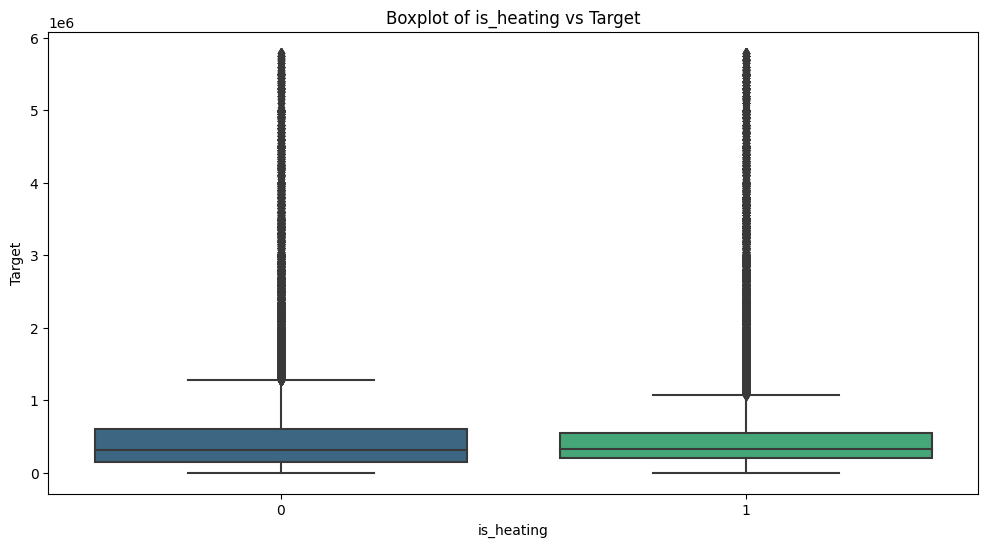

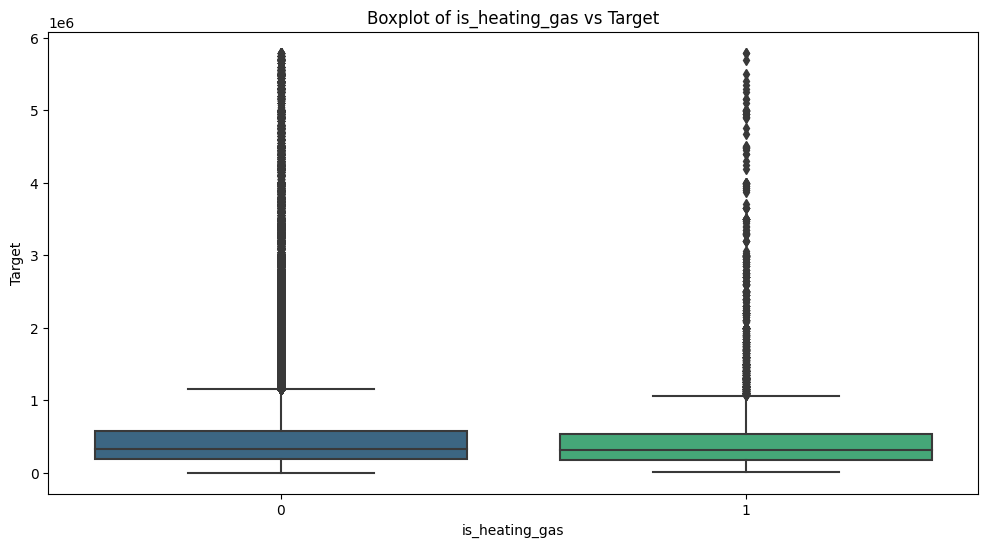

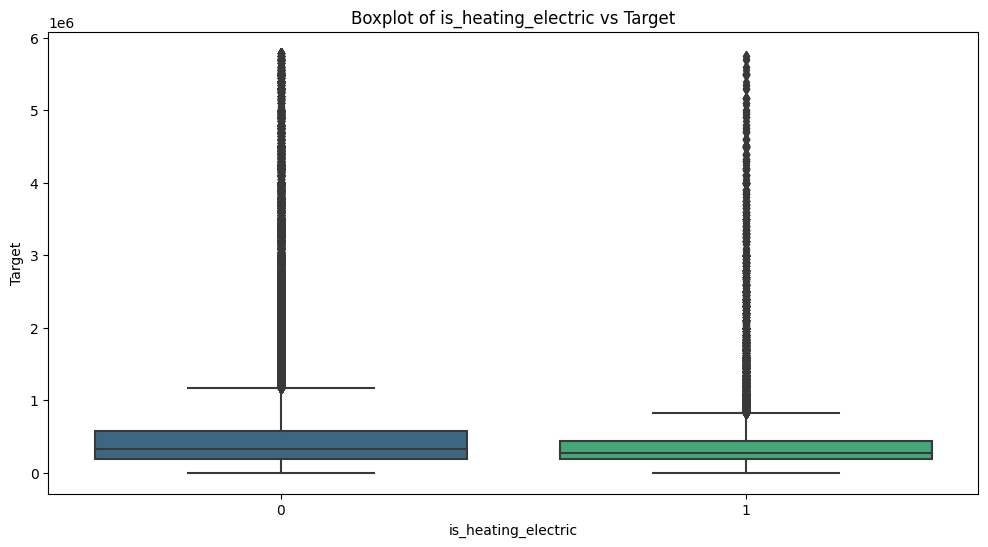

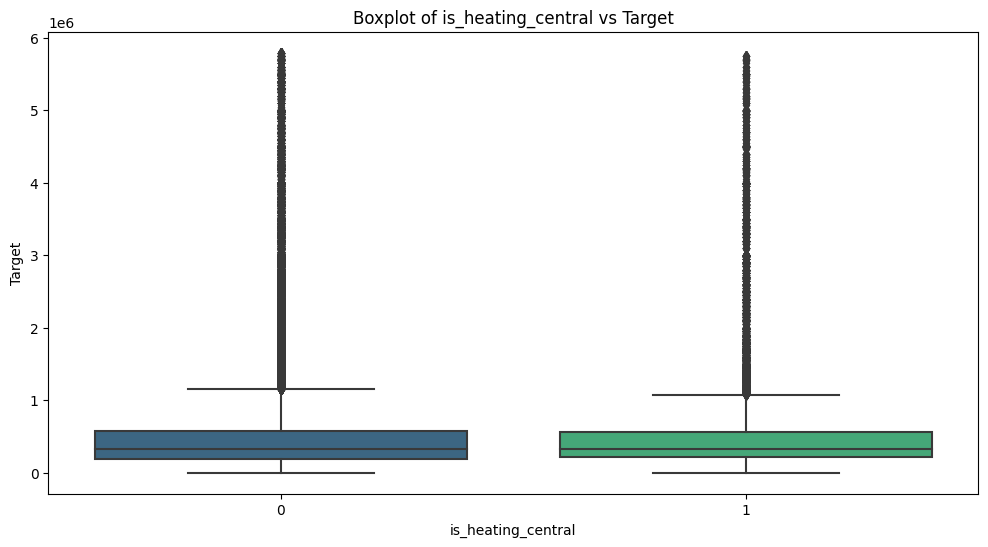

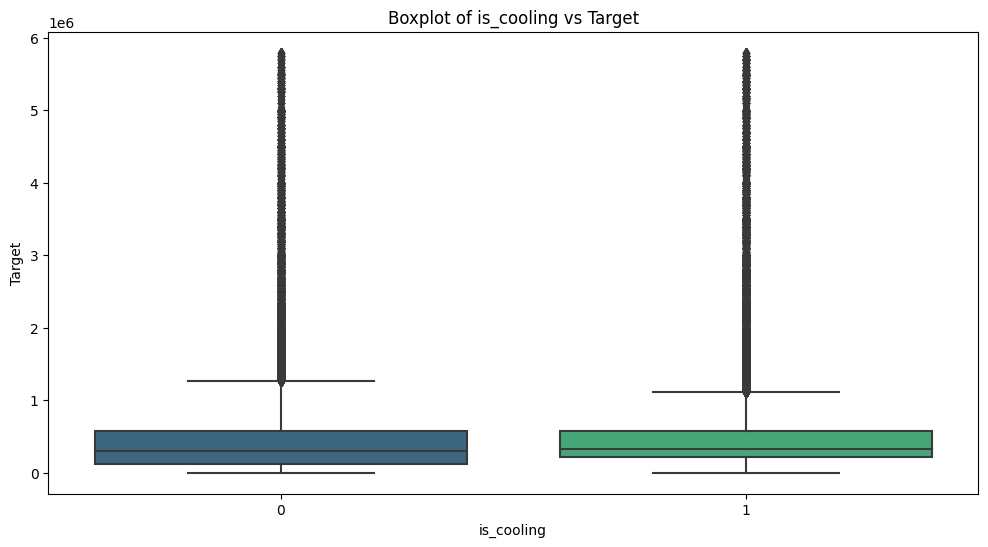

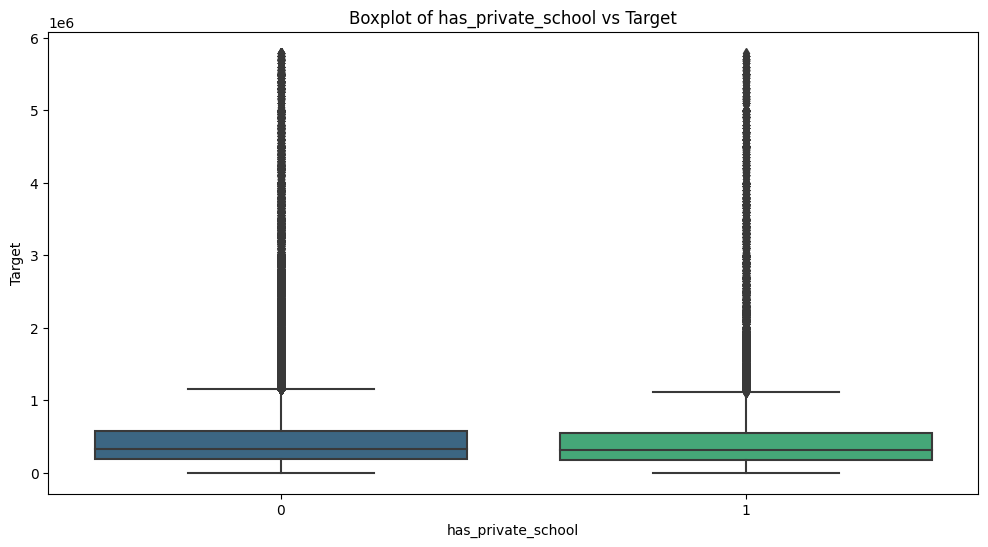

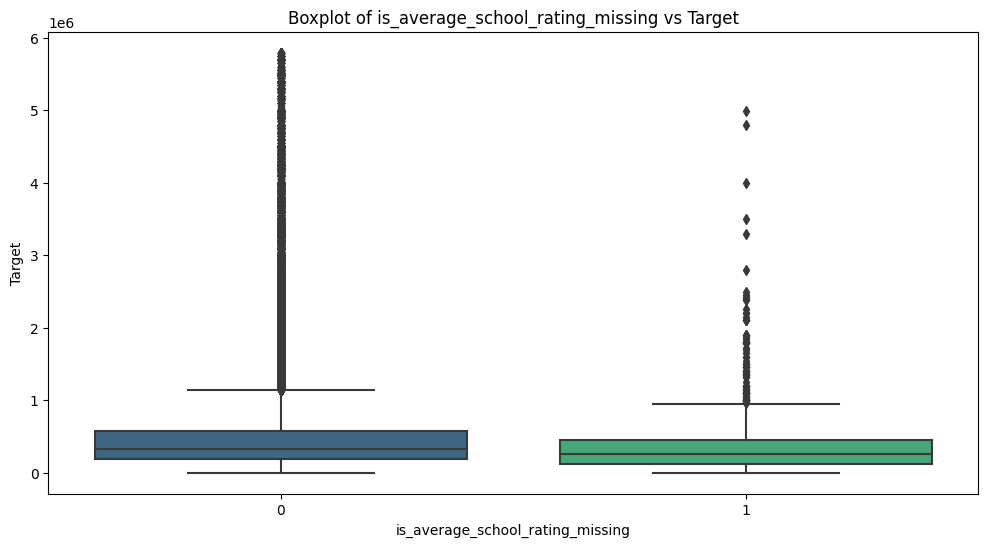

In [15]:
# Создаем boxplot диаграмму для каждого бинарного признака относительно целевой переменной

for column in binary_columns:
    plt.figure(figsize=(12, 6))

    # Boxplot диаграмма
    sns.boxplot(x=df[column].astype(int), y=df['target'], palette='viridis')
    plt.title(f"Boxplot of {column} vs Target")
    plt.xlabel(column)
    plt.ylabel('Target')

    plt.show()

Поскольку наблюдений для каждого бинарного признака более 5000, то вместо теста Манна-Уитни, для проверки влияния бинарных признаков на стоимость дома проведем регрессионный анализ.

In [16]:
# Подготовка данных для регрессионного анализа
X = df[binary_columns]
X = sm.add_constant(X)
y = df['target']

# Построение регрессионной модели
model = sm.OLS(y, X).fit()

# Вывод результатов
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1368.
Date:                Sat, 22 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:36:20   Log-Likelihood:            -5.2678e+06
No. Observations:              356479   AIC:                         1.054e+07
Df Residuals:                  356466   BIC:                         1.054e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Выводы:
* Высокое значение F-статистики (1368) и нулевое значение p-value говорят о том, что модель в целом значима.
* `const: 5.337e+05` говорит о том, что средняя стоимость дома, если все бинарные признаки равны нулю, составляет примерно $533700
* `PrivatePool: 3.03e+05` - больше всего на стоимость дома влияет наличии частного бассейна - это увеличивает стоимость дома на $303000
* $R^2 = 0.044$ - это значение говорит о том, что модель объясняет 4.4% вариации целевого признака target. Это довольно низкое значение, что указывает на слабую способность модели объяснять изменчивость стоимости домов на основе данных бинарных признаков.

#### Закодируем категориальные признаки

In [17]:
# Закодирование признака zipcode с помощью LabelEncoder
le_zipcode = preprocessing.LabelEncoder()
le_state = preprocessing.LabelEncoder()

df['zipcode'] = le_zipcode.fit_transform(df['zipcode'])
df['state'] = le_state.fit_transform(df['state'])

# Закодирование признаков status, propertyType, state с помощью OneHotEncoder
onehot_encoder = preprocessing.OneHotEncoder(sparse=False, drop='first')

# Выбираем колонки для OneHotEncoder
categorical_columns = ['status', 'propertyType']

# Применяем OneHotEncoder к категориальным признакам
encoded_data = onehot_encoder.fit_transform(df[categorical_columns])

# Получение имен новых колонок после OneHotEncoding
encoded_columns = onehot_encoder.get_feature_names_out(categorical_columns)

# Создаем датафрейм с закодированными данными
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Удаляем исходные категориальные признаки из исходного датафрейма
df = df.drop(columns=categorical_columns)

# Соединяем закодированные признаки с исходным датафреймом
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

df_encoded

/Users/moskalen/Documents/mine/IDE/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,baths,fireplace,sqft,zipcode,beds,state,PrivatePool,target,year_built,parking,...,status_under_contract,status_unknown,propertyType_coop,propertyType_land,propertyType_multi,propertyType_other,propertyType_single,propertyType_townhouse,propertyType_traditional,propertyType_unknown
0,3,1,2900,796,4,19,0,418000,2019.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,0,1947,4145,3,33,0,310000,2019.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1,3000,3287,3,2,1,2895000,1961.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8,1,6457,2343,5,29,0,2395000,2006.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,1084,0,6,0,5000,1985.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356474,6,0,4017,1170,5,6,1,1249000,1990.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
356475,3,0,2000,2165,3,9,0,674999,1924.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356476,3,0,1152,243,3,22,0,528000,1950.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
356477,0,0,0,2532,0,29,0,34500,1985.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# удалим из df_encoded изначальные признаки, значение которыъ были логарифмировано.

if 'sqft' in df_encoded:
    df_encoded.drop(['sqft', 'average_school_distance', 'num_schools', 'target'], axis=1, inplace=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356479 entries, 0 to 356478
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   baths                             356479 non-null  int64  
 1   fireplace                         356479 non-null  int64  
 2   zipcode                           356479 non-null  int64  
 3   beds                              356479 non-null  int64  
 4   state                             356479 non-null  int64  
 5   PrivatePool                       356479 non-null  int64  
 6   year_built                        356479 non-null  float64
 7   parking                           356479 non-null  int64  
 8   is_remodeled                      356479 non-null  int64  
 9   is_year_built_missing             356479 non-null  int64  
 10  is_heating                        356479 non-null  int64  
 11  is_heating_gas                    356479 non-null  i

## Выводы

* выделили числовые и номинативные признаки
* удалили выбросы в чиловых признаках
* вычислили коэффициент асимметрии (skewness) и эксцесс (kurtosis) для количественной оценки асимметрию и формы распределения. Это позволило узнать, для каких признаков требуется логарифмирование:
    * `sqft`
    * `target`
    * `average_school_distance`
    * `num_schools`
* провели статистические тесты, показывающие влияние принаков на стоимость дома:
    * существуют статистически значимые различия в средних значениях стоимости домов между различными группами для всех категориальных признаков: `'status', 'propertyType', 'zipcode', 'state'`
    * на основе регрессионного анализа можем утверждать, что стоимость дома не зависит только от бинарных признаков.

In [19]:
step2_time = datetime.now()

# 3. Построение модели

In [20]:
import optuna
import pickle

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor, Pool

from sklearn import metrics


TEST_SIZE = 0.2
RANDOM_SEED = 42

/Users/moskalen/Documents/mine/IDE/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
data = df_encoded.copy()
mean_log_price = np.mean(data['target_log'])

def get_real_mae(mae_log, mean_log_price=mean_log_price):
    """Возвращает MAE в реальной стоимости дома"""

    # Средняя стоимость дома на логарифмированной шкале
    mean_price_log = mean_log_price

    # Преобразование MAE в реальную стоимость
    mean_price_real = np.exp(mean_price_log)
    mae_real = np.exp(mean_price_log + mae_log) - mean_price_real

    return mae_real


def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    """Выводит метрики модели"""
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    mae_log_train = metrics.mean_absolute_error(y_train, y_train_predict)
    print('Train MAE: {:.3f}'.format(mae_log_train))
    print('Train Real MAE: {:.3f}'.format(get_real_mae(mae_log_train)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')

    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    mae_log_test = metrics.mean_absolute_error(y_test, y_test_predict)
    print('Test MAE: {:.3f}'.format(mae_log_test))
    print('Test Real MAE: {:.3f}'.format(get_real_mae(mae_log_test)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

y = data['target_log']
X = data.drop(['target_log'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)


### 1. LinearRegression

In [22]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.370
Train MAE: 0.641
Train Real MAE: 274079.894
Train MAPE: 5.314


Test R^2: 0.369
Test MAE: 0.635
Test Real MAE: 270662.972
Test MAPE: 5.312


### Выводы
* Значения метрик для данных обучения и тестирования очень близки, что указывает на то, что модель хорошо обобщает и не переобучена.
* Хотя $R^2$ не очень высокий (около 37%), модель все же объясняет значительную часть вариации целевой переменной.
* Значения MAE и MAPE указывают на то, что предсказания модели довольно точны. MAPE около 5.3% означает, что средняя ошибка предсказаний составляет около 5.3% от фактических значений

### 2. Polynomial Regression

Попробуем полиномиальную регрессию 

In [23]:
# Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)

# Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)

# Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

# Выводим результирующие размерности таблиц
print("X_train shape:", X_train_poly.shape)
print("X_test shape:", X_test_poly.shape)

# Создаём объект класса LinearRegression
lr_model_poly = LinearRegression()

# Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)


X_train shape: (285183, 702)
X_test shape: (71296, 702)
Train R^2: 0.616
Train MAE: 0.479
Train Real MAE: 187319.343
Train MAPE: 3.959


Test R^2: 0.611
Test MAE: 0.475
Test Real MAE: 185425.074
Test MAPE: 3.987


### Выводы
* Полиномиальная регрессия 2-й степени значительно улучшила качество модели по сравнению с линейной регрессией (MAE_poly: 0.475 против MAE_lr: 0.635)
* $R^2$ на тренировочной и тестовой выборках очень близки, что говорит о хорошем соответствии модели как на тренировочных, так и на тестовых данных.
* MAE и MAPE на тестовых данных указывают на улучшение точности модели в реальных условиях.

Просто для интереса посмотрим на результаты полиномиальной регрессии 3-го уровня.
Ниже закомментированный код работал 41 минуту и выдал следующий результат:
```
X_train shape: (285183, 9138)
X_test shape: (71296, 9138)
Train R^2: 0.691
Train MAE: 0.419
Train Real MAE: 158783.085
Train MAPE: 3.467


Test R^2: -0.145
Test MAE: 0.435
Test Real MAE: 165908.078
Test MAPE: 3.650
```

Отрицательныое значение `Test R^2: -0.145` указывает на то, что модель хуже, чем простое среднее значение, то есть наблюдается явный признак переобучения: модель слишком хорошо подстроилась под тренировочные данные и не смогла обобщить закономерности на тестовые данные.

In [24]:
# # Создаём генератор полиномиальных признаков
# poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)

# poly.fit(X_train)

# # Генерируем полиномиальные признаки для тренировочной выборки
# X_train_poly = poly.transform(X_train)

# # Генерируем полиномиальные признаки для тестовой выборки
# X_test_poly = poly.transform(X_test)

# # Выводим результирующие размерности таблиц
# print("X_train shape:", X_train_poly.shape)
# print("X_test shape:", X_test_poly.shape)

# # Создаём объект класса LinearRegression
# lr_model_poly = LinearRegression()

# # Обучаем модель по МНК
# lr_model_poly.fit(X_train_poly, y_train)

# # Делаем предсказание для тренировочной выборки
# y_train_predict_poly = lr_model_poly.predict(X_train_poly)

# # Делаем предсказание для тестовой выборки
# y_test_predict_poly = lr_model_poly.predict(X_test_poly)

# print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

# #Рассчитываем коэффициент детерминации для двух выборок
# print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
# print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

### 3. DecisionTreeRegressor

Для этой модели подберем оптимальную глубину дерева с помощью метода кросс-валидации вместе с поиском по сетке гиперпараметров (Grid Search).

In [25]:
# Определение сетки параметров
param_grid = {'max_depth': np.arange(1, 21)}

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=RANDOM_SEED),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
)

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод наилучшего параметра
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

# Оценка модели с наилучшим параметром
model_dt = grid_search.best_estimator_

y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Best max_depth: 20
Train R^2: 0.902
Train MAE: 0.195
Train Real MAE: 65651.856
Train MAPE: 1.609


Test R^2: 0.715
Test MAE: 0.346
Test Real MAE: 125865.649
Test MAPE: 2.912


### Выводы
* видим высокое значение $R^2$ на тренировочной выборке (0.902) и значительно более низкое на тестовой выборке (0.715). Это указывает на переобучение, когда модель слишком хорошо подгоняется под тренировочные данные и не обобщает на новые данные
* построим графики значений MAPE и $R^2$ для разных глубин дерева тренировочной и тестовой выборок, чтобы найти оптимальную глубину, где значения MAPE и $R^2$ начинают расходиться

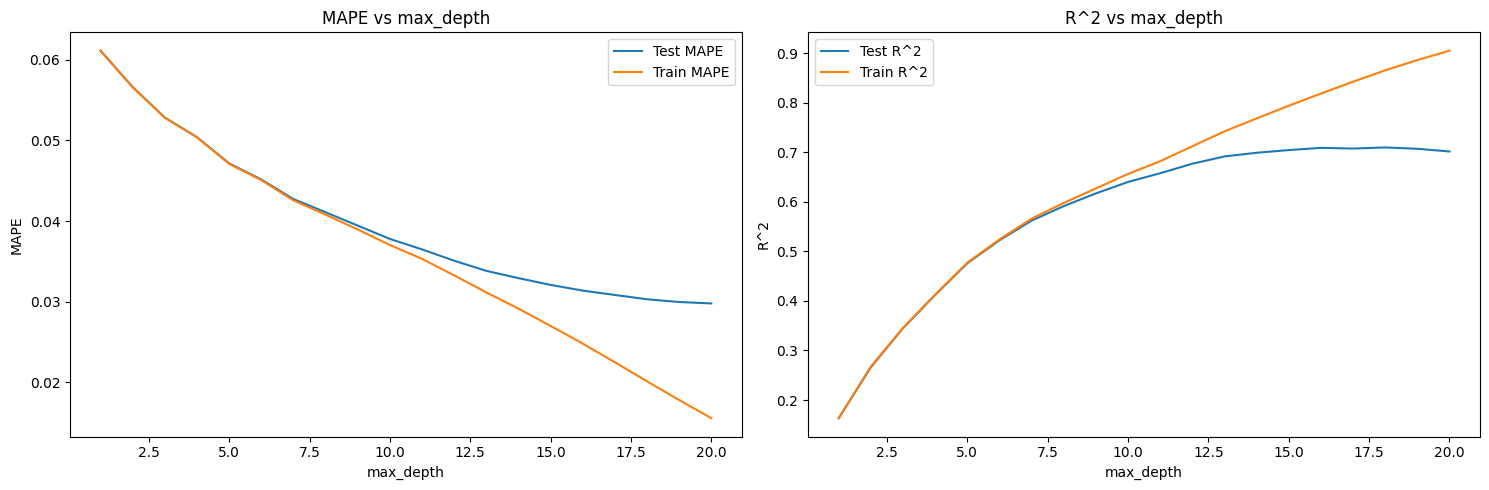

In [26]:
# Создание скоров для MAPE и R^2
scorers = {
    'mape': metrics.make_scorer(metrics.mean_absolute_percentage_error, greater_is_better=False),
    'r2': metrics.make_scorer(metrics.r2_score)
}

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=RANDOM_SEED),
    param_grid=param_grid,
    cv=5,
    scoring=scorers,
    refit='mape',
    return_train_score=True,
    n_jobs=-1
)

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Получение результатов
results = pd.DataFrame(grid_search.cv_results_)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График для MAPE
sns.lineplot(ax=axes[0], x=results['param_max_depth'], y=-results['mean_test_mape'], label='Test MAPE')
sns.lineplot(ax=axes[0], x=results['param_max_depth'], y=-results['mean_train_mape'], label='Train MAPE')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('MAPE')
axes[0].set_title('MAPE vs max_depth')
axes[0].legend()

# График для R^2
sns.lineplot(ax=axes[1], x=results['param_max_depth'], y=results['mean_test_r2'], label='Test R^2')
sns.lineplot(ax=axes[1], x=results['param_max_depth'], y=results['mean_train_r2'], label='Train R^2')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('R^2')
axes[1].set_title('R^2 vs max_depth')
axes[1].legend()

plt.tight_layout()
plt.show()

In [27]:
# Оценка модели с наилучшим параметром
model_dt = DecisionTreeRegressor(
    max_depth=7,
    random_state=RANDOM_SEED
)

model_dt.fit(X_train, y_train)

y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.568
Train MAE: 0.514
Train Real MAE: 204991.502
Train MAPE: 4.251


Test R^2: 0.563
Test MAE: 0.511
Test Real MAE: 203235.737
Test MAPE: 4.276


### Выводы
* Модель с `max_depth=7` имеет схожие значения $R^2$ на тренировочной (0.568) и тестовой выборке (0.563), что указывает на лучшую обобщающую способность модели, хотя и с меньшей точностью по сравнению с моделью с `max_depth=20`
* На тестовой выборке, модель с `max_depth=20` также показывает меньшие ошибки, по сравнению с моделью с `max_depth=20`, но разница между тренировочной и тестовой ошибками значительно больше, что подтверждает переобучение.
* Лучше использовать модель с `max_depth=7`. Несмотря на более высокие ошибки, эта модель менее подвержена переобучению и показывает более сбалансированное поведение на тренировочных и тестовых данных. Она лучше обобщает на новые данные, что делает её более надежной для практического применения.
* Полиномиальная регрессия 2-го уровня все еще выигрывает у всех рассмотренных моделей:

|Модель                 | Train $R^2$ | Train MAE | Test $R^2$ | Test MAE |
|-----------------------|-------------|-----------|------------|----------|
| LinearRegression      | 0.370       | 0.641     | 0.369      | 0.635    |
| Polynomial Regression | 0.616       | 0.479     | 0.611      | 0.475    |
| DecisionTreeRegressor | 0.568       | 0.514     | 0.563      | 0.511    |

### 4. RandomForestRegressor

Попробуем ансамблевый метод случайного леса.

In [28]:
# Создаём модель RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=RANDOM_SEED, n_jobs=-1)

# Обучаем модель на тренировочных данных
model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.969
Train MAE: 0.105
Train Real MAE: 33732.211
Train MAPE: 0.877


Test R^2: 0.825
Test MAE: 0.260
Test Real MAE: 90326.381
Test MAPE: 2.225


### Выводы
* Модель показала наилучшие метрики по сравнению с другими моделями на тестовых данных
* Смущает различие метрики $R^2$ на тренировочных (0.969) и тестовых (0.825) данных, что говорит о некоторой степени переобучения, поэтому применим `GridSearchCV` класс для выбора оптимальных гиперпараметров модели `RandomForestRegressor`

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Определение модели
rf = RandomForestRegressor(random_state=42)

# Определение сетки гиперпараметров для поиска
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Определение GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_absolute_error'
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшие гиперпараметры
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Обучение модели с лучшими гиперпараметрами
best_rf = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   6.6s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   6.6s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   6.6s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   6.7s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   6.7s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   6.6s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   6.7s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2; total time=   6.6s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   6.7s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   6.7s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=5; total time=   6.7s
[CV] END max_depth=1, min_samples

### Выводы
* получили модель со следующими оптимальными (исключая сразу модель с параметрами по-умолчанию) параметрами: `{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}`

* Таблица с рассмотренными моделями:
    |Модель                 | Train $R^2$ | Train MAE | Test $R^2$ | Test MAE |
    |-----------------------|-------------|-----------|------------|----------|
    | LinearRegression      | 0.370       | 0.641     | 0.369      | 0.635    |
    | Polynomial Regression | 0.616       | 0.479     | 0.611      | 0.475    |
    | DecisionTreeRegressor | 0.568       | 0.514     | 0.563      | 0.511    |
    | RandomForestRegressor | 0.683       | 0.428     | 0.672      | 0.430    |
<br>

* модель `RandomForestRegressor` показывает лучший результат на данном этапе


## 5. CatBoostRegressor

Построим модель со случайно выбранными гиперпараметрами:
* iterations=500
* learning_rate=0.1
* depth=6,

In [30]:
categorical_features = ['zipcode', 'state']

# Создание объекта Pool для обучения модели
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Создание и обучение модели CatBoostRegressor
model = CatBoostRegressor(iterations=500,
                          learning_rate=0.1,
                          depth=6,
                          cat_features=categorical_features,
                          verbose=100)

model.fit(train_pool)

# Предсказания
y_train_pred = model.predict(train_pool)
y_test_pred = model.predict(test_pool)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

0:	learn: 1.0689756	total: 87.2ms	remaining: 43.5s
100:	learn: 0.5732997	total: 2.24s	remaining: 8.86s
200:	learn: 0.5415928	total: 4.39s	remaining: 6.54s
300:	learn: 0.5266913	total: 6.49s	remaining: 4.29s
400:	learn: 0.5153722	total: 8.58s	remaining: 2.12s
499:	learn: 0.5077031	total: 10.7s	remaining: 0us
Train R^2: 0.807
Train MAE: 0.310
Train Real MAE: 110866.418
Train MAPE: 2.580


Test R^2: 0.795
Test MAE: 0.314
Test Real MAE: 112490.489
Test MAPE: 2.671


### Выводы
* модель `CatBoostRegressor` показывает лучшую метрику без признаков переобучения

* Таблица с рассмотренными моделями:
    |Модель                 | Train $R^2$ | Train MAE | Test $R^2$ | Test MAE |
    |-----------------------|-------------|-----------|------------|----------|
    | LinearRegression      | 0.370       | 0.641     | 0.369      | 0.635    |
    | Polynomial Regression | 0.616       | 0.479     | 0.611      | 0.475    |
    | DecisionTreeRegressor | 0.568       | 0.514     | 0.563      | 0.511    |
    | RandomForestRegressor | 0.687       | 0.423     | 0.674      | 0.428    |
    | CatBoostRegressor     | 0.807       | 0.310     | 0.795      | 0.314    |
<br>

* Попробуем улучшить модель с помощью библиотеки `optuna`

In [31]:
categorical_features = ['zipcode', 'state']

# Создание объекта Pool для обучения модели
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Функция для оптимизации гиперпараметров с использованием Optuna
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 1e-3, 10),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'cat_features': categorical_features,
        'verbose': 0,
        'random_state': RANDOM_SEED,
    }

    model = CatBoostRegressor(**param)
    model.fit(train_pool)

    y_pred = model.predict(test_pool)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    return mae

# Запуск оптимизации с использованием Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Вывод лучших гиперпараметров
print("Best parameters:", study.best_params)

# Обучение и оценка модели с лучшими гиперпараметрами
best_params = study.best_params
model = CatBoostRegressor(**best_params)
model.fit(train_pool)

y_train_pred = model.predict(train_pool)
y_test_pred = model.predict(test_pool)

[I 2024-06-22 14:55:34,150] A new study created in memory with name: no-name-1015bb50-a018-40b9-b686-6f0c6ba55640
/var/folders/nc/ybcdybgx0tl4kk5tp22yfjs00000gq/T/ipykernel_92458/1414296114.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
/var/folders/nc/ybcdybgx0tl4kk5tp22yfjs00000gq/T/ipykernel_92458/1414296114.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10),
/var/folders/nc/ybcdybgx0tl4kk5tp22yfjs00000gq/T/ipykernel_92458/1414296114.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

Best parameters: {'iterations': 670, 'depth': 10, 'learning_rate': 0.07821272613797381, 'random_strength': 0.058920739037537605, 'bagging_temperature': 1.9072505791409633, 'border_count': 145, 'l2_leaf_reg': 2.258074421324944}
0:	learn: 1.0701594	total: 46.4ms	remaining: 31s
1:	learn: 1.0221766	total: 83.8ms	remaining: 28s
2:	learn: 0.9782178	total: 120ms	remaining: 26.6s
3:	learn: 0.9389470	total: 160ms	remaining: 26.7s
4:	learn: 0.9032619	total: 199ms	remaining: 26.4s
5:	learn: 0.8711570	total: 236ms	remaining: 26.1s
6:	learn: 0.8429089	total: 271ms	remaining: 25.6s
7:	learn: 0.8165018	total: 305ms	remaining: 25.3s
8:	learn: 0.7930068	total: 343ms	remaining: 25.2s
9:	learn: 0.7719878	total: 380ms	remaining: 25.1s
10:	learn: 0.7537327	total: 413ms	remaining: 24.8s
11:	learn: 0.7371385	total: 452ms	remaining: 24.8s
12:	learn: 0.7221997	total: 486ms	remaining: 24.6s
13:	learn: 0.7089049	total: 523ms	remaining: 24.5s
14:	learn: 0.6968886	total: 556ms	remaining: 24.3s
15:	learn: 0.6863195

In [32]:
print(best_params)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

{'iterations': 670, 'depth': 10, 'learning_rate': 0.07821272613797381, 'random_strength': 0.058920739037537605, 'bagging_temperature': 1.9072505791409633, 'border_count': 145, 'l2_leaf_reg': 2.258074421324944}
Train R^2: 0.846
Train MAE: 0.272
Train Real MAE: 95201.117
Train MAPE: 2.260


Test R^2: 0.819
Test MAE: 0.287
Test Real MAE: 101259.211
Test MAPE: 2.445


### Выводы

* нашли оптимальные параметры модели с помощью библиотеки `optuna`, которые улучшили метрики

* Таблица с рассмотренными моделями:
    |Модель                      | Train $R^2$ | Train MAE | Test $R^2$ | Test MAE |
    |----------------------------|-------------|-----------|------------|----------|
    | LinearRegression           | 0.370       | 0.641     | 0.369      | 0.635    |
    | Polynomial Regression      | 0.616       | 0.479     | 0.611      | 0.475    |
    | DecisionTreeRegressor      | 0.568       | 0.514     | 0.563      | 0.511    |
    | RandomForestRegressor      | 0.687       | 0.423     | 0.674      | 0.428    |
    | CatBoostRegressor          | 0.807       | 0.310     | 0.795      | 0.314    |
    | CatBoostRegressor (optuna) | 0.846       | 0.272     | 0.819      | 0.287    |
<br>

* Добавим валидационную выборку для выбора лучших гиперпараметров модели, чтобы обеспечить более надежную оценку модели

In [33]:
categorical_features = ['zipcode', 'state']

# Разделение на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Создание объекта Pool для обучения и валидации модели
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
val_pool = Pool(X_val, y_val, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Функция для оптимизации гиперпараметров с использованием Optuna
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 1e-3, 10),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'cat_features': categorical_features,
        'verbose': 0,
        'random_state': RANDOM_SEED,
    }

    model = CatBoostRegressor(**param)
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50)

    y_pred = model.predict(val_pool)
    mae = metrics.mean_absolute_error(y_val, y_pred)
    return mae

# Запуск оптимизации с использованием Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Вывод лучших гиперпараметров
print("Best parameters:", study.best_params)


[I 2024-06-22 15:12:38,943] A new study created in memory with name: no-name-13a4be0c-eed6-45e1-8abc-714ca2cb8255
/var/folders/nc/ybcdybgx0tl4kk5tp22yfjs00000gq/T/ipykernel_92458/1262156269.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
/var/folders/nc/ybcdybgx0tl4kk5tp22yfjs00000gq/T/ipykernel_92458/1262156269.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10),
/var/folders/nc/ybcdybgx0tl4kk5tp22yfjs00000gq/T/ipykernel_92458/1262156269.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

Best parameters: {'iterations': 750, 'depth': 10, 'learning_rate': 0.09792340487903971, 'random_strength': 0.0019367667041436639, 'bagging_temperature': 0.004366130452667192, 'border_count': 147, 'l2_leaf_reg': 0.0018755999469640791}


In [34]:
def print_group_metrics(y_true, y_predict, group):
    """Выводит метрики модели для выбранной выборки"""
    print(f'\n{group} R^2: {metrics.r2_score(y_true, y_predict):.3f}')
    mae_log = metrics.mean_absolute_error(y_true, y_predict)
    print(f'{group} MAE: {mae_log:.3f}')
    print(f'{group} Real MAE: {get_real_mae(mae_log):.3f}')
    print(f'{group} MAPE: {metrics.mean_absolute_percentage_error(y_true, y_predict)*100:.3f}')


# Обучение и оценка модели с лучшими гиперпараметрами
best_params = study.best_params
model = CatBoostRegressor(**best_params, random_state=RANDOM_SEED)
model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50)

y_train_pred = model.predict(train_pool)
y_val_pred = model.predict(val_pool)
y_test_pred = model.predict(test_pool)

print(f'Best params: {best_params}')
print_group_metrics(y_train, y_train_pred, 'Train')
print_group_metrics(y_val, y_val_pred, 'Val')
print_group_metrics(y_test, y_test_pred, 'Test')

0:	learn: 1.0585185	test: 1.0565991	best: 1.0565991 (0)	total: 40.1ms	remaining: 30s
1:	learn: 0.9997671	test: 0.9967773	best: 0.9967773 (1)	total: 72.1ms	remaining: 27s
2:	learn: 0.9477502	test: 0.9437380	best: 0.9437380 (2)	total: 107ms	remaining: 26.7s
3:	learn: 0.9024202	test: 0.8971452	best: 0.8971452 (3)	total: 137ms	remaining: 25.5s
4:	learn: 0.8624248	test: 0.8555038	best: 0.8555038 (4)	total: 172ms	remaining: 25.6s
5:	learn: 0.8273419	test: 0.8194035	best: 0.8194035 (5)	total: 205ms	remaining: 25.4s
6:	learn: 0.7970336	test: 0.7879336	best: 0.7879336 (6)	total: 235ms	remaining: 24.9s
7:	learn: 0.7709135	test: 0.7608534	best: 0.7608534 (7)	total: 264ms	remaining: 24.5s
8:	learn: 0.7474798	test: 0.7371839	best: 0.7371839 (8)	total: 300ms	remaining: 24.7s
9:	learn: 0.7272599	test: 0.7165670	best: 0.7165670 (9)	total: 337ms	remaining: 24.9s
10:	learn: 0.7101933	test: 0.6990362	best: 0.6990362 (10)	total: 375ms	remaining: 25.2s
11:	learn: 0.6951359	test: 0.6837367	best: 0.6837367 (

In [44]:
# сохраняем модель и энкодеры для дальнейшего использования
with open("web/app/models/model_and_encoders.pkl", "wb") as f:
    pickle.dump((model, le_zipcode, le_state, onehot_encoder), f)

### Выводы 

* Таблица с рассмотренными моделями:
    |Модель                           | Train $R^2$ | Train MAE | Test $R^2$ | Test MAE | Test MAPE |
    |---------------------------------|-------------|-----------|------------|----------|-----------|
    | LinearRegression                | 0.370       | 0.641     | 0.369      | 0.635    | 5.312     |
    | Polynomial Regression           | 0.616       | 0.479     | 0.611      | 0.475    | 3.987     |
    | DecisionTreeRegressor           | 0.568       | 0.514     | 0.563      | 0.511    | 2.912     |
    | RandomForestRegressor           | 0.687       | 0.423     | 0.674      | 0.428    | 2.225     |
    | CatBoostRegressor               | 0.807       | 0.310     | 0.795      | 0.314    | 2.671     |
    | CatBoostRegressor (optuna)      | 0.855       | 0.263     | 0.822      | 0.282    | 2.445     |
    | CatBoostRegressor (optuna, val) | 0.863       | 0.255     | 0.823      | 0.281    | 2.388     |
<br>

* Наилучшие показатели по метрикам $R^2$ и $MAE$ показала модель `CatBoostRegressor` с валидационной выборкой, которую использовали для настройки гиперпараметров


In [36]:
step3_time = datetime.now()

print(f"Время выполнения шага 2: {step2_time - start_time}")
print(f"Время выполнения шага 3: {step3_time - step2_time}")
print(f"\nВремя выполнения ноутбука: {step3_time - start_time}")

Время выполнения шага 2: 0:02:33.075652
Время выполнения шага 3: 0:54:27.567475

Время выполнения ноутбука: 0:57:00.643127
